## Import Libraries

In [495]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Secondary School

### Dataset Loading

In [556]:
# Load Dataset
school_df = pd.read_excel(r'C:\Users\pc\OneDrive\Documents\Dev_Tools\test_codes\social_infra\excel_files\samarqand_student_data 1.xlsx')
df = school_df.copy()

### Dataset First View

In [557]:
# Dataset First Look
df.head()

,id,Region name,District name,School name,Elementary (Grades 1-4),Enter the year the building was constructed,"If completed, enter the year",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),"Number of shifts (1, 2, or 3)",Between grades 1-4,Between grades 5-9,Between grades 10-11,Available vacant land area on the school premises for the construction of an additional academic building,"Number of academic buildings (do not include branch campuses, if any)",Number of floors:,Enter the type of wall material:,Condition of the building walls,Building foundations,Condition of the concrete slabs (ceiling) between floors,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Condition of the assembly hall,Condition of the kitchen,Availability of drinking water and handwashing facilities in the kitchen,Condition of electricity supply throughout the day,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Condition of the internal electrical system,Condition of the lighting system,Source of the heating system,Fuel source for local or improvised heating systems,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Availability of water in the school,Source of drinking water supply,Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Is the school perimeter fenced with a boundary wall?,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Does the school have a branch?,Have any repair or reconstruction works been carried out in the building?,Total,Boys,Girls,Uzbek,Karakalpak,Russian,Tajik,Kazakh,Kyrgyz,Turkmen,Do you consider the building safe during an earthquake?,Number of floors:.1,Enter the type of wall material of the building:,Condition of the building walls.1,Building foundations.1,Condition of the concrete slabs (ceiling) between floors.1,Do you consider the building safe during an earthquake?.1,Enter the type of roofing material of the building:,Condition of the building roof.1,Condition of windows and frames in classrooms.1,Condition of the floors in classrooms.1,Condition of the doors in classrooms.1,Number of floors:.2,Enter the type of wall material of the building:.1,Condition of the building walls.2,Building foundations.2,Condition of the concrete slabs (ceiling) between floors.2,Do you consider the building safe during an earthquake?.2,Enter the type of roofing material of the building.1,Condition of the building roof.2,Condition of windows and frames in classrooms.2,Condition of the floors in classrooms.2,Condition of the doors in classrooms.2,Where is the functioning restroom located in the school?,Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Total.1,Men,Women,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Is the p

### Dataset Rows & Columns count

In [558]:
# Dataset Rows & Columns count
df.shape

(1261, 109)

### Dataset Information

In [559]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 109 entries, id to What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?
dtypes: float64(16), int64(13), object(80)
memory usage: 1.0+ MB


#### Duplicate Values

In [560]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    1261
Name: count, dtype: int64

#### Missing Values/Null Values

In [561]:
# Missing Values/Null Values Count
df.isnull().sum()

# columns where all the values are missing
null_counts = df.isnull().sum()
columns_with_1261_nulls = null_counts[null_counts == 1261]
columns_with_1261_nulls

# We will directly drop these columns
df = df.drop(columns_with_1261_nulls.index, axis=1)

# columns where the null values are greater than 1000
null_counts = df.isnull().sum()
columns_with_1000_nulls = null_counts[null_counts > 1000]
display(columns_with_1000_nulls)

"""
Russian                                                                                               1164
Tajik                                                                                                 1235
Enter the type of wall material of the building:.1                                                    1137
Condition of the building walls.2                                                                     1137
Do you consider the building safe during an earthquake?.2                                             1137
Enter the type of roofing material of the building.1                                                  1137
Condition of the building roof.2                                                                      1137
Condition of windows and frames in classrooms.2                                                       1137
Condition of the floors in classrooms.2                                                               1137
Condition of the doors in classrooms.2                                                                1137
What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?    1147
dtype: int64
"""
# We can see that most of these columns are getting repeated, so we will drop them right away
df = df.drop(columns_with_1000_nulls.index, axis=1)

df.isnull().sum()

# columns where the null values are greater than 100
null_counts = df.isnull().sum()
columns_with_100_nulls = null_counts[null_counts > 100]
columns_with_100_nulls

"""
If completed, enter the year                                       406
Enter the type of wall material of the building:                   688
Condition of the building walls.1                                  688
Do you consider the building safe during an earthquake?.1          689
Enter the type of roofing material of the building:                690
Condition of the building roof.1                                   691
Condition of windows and frames in classrooms.1                    691
Condition of the floors in classrooms.1                            691
Condition of the doors in classrooms.1                             691
What is the condition of the standard (project-based) restroom?    179
dtype: int64
"""
# Here also, we can see that most of these columns are getting repeated, so we will drop them right away but we will only drop the columns that are getting repeated
repeated_columns = ['Condition of the building walls.1', 'Do you consider the building safe during an earthquake?.1', 'Condition of the building roof.1', 'Condition of windows and frames in classrooms.1', 'Condition of the floors in classrooms.1', 'Condition of the doors in classrooms.1']
df = df.drop(repeated_columns, axis=1)

# The rest of the missing values we will handle later


Russian                                                                                               1164
Tajik                                                                                                 1235
Enter the type of wall material of the building:.1                                                    1137
Condition of the building walls.2                                                                     1137
Do you consider the building safe during an earthquake?.2                                             1137
Enter the type of roofing material of the building.1                                                  1137
Condition of the building roof.2                                                                      1137
Condition of windows and frames in classrooms.2                                                       1137
Condition of the floors in classrooms.2                                                               1137
Condition of the doors in classrooms.

In [562]:
# Shape of the data after removing null values
df.shape

(1261, 79)

### What did you know about your dataset?

Our dataset had 1261 rows and 109 columns.
Data types of the columns are as follows:-
- float64(16), 
- int64(13), 
- object(80)

There were no fully duplicated rows found in the dataset.
However there were many repeated columns in the dataset, where there was 100% null values. Hence, these columns were dropped.
There were many other columns with more than 1000 null values. Hence, these columns were dropped, because most of them were repeated and the others were not useful.
Few more columns were there with more than 100 null values and repeated columns. Hence, these columns were dropped.
Rest of the null values will be handled accordingly as we move forward in the analysis.

After this pocess the shape of the dataset is as follows:
(1261, 79)


### Dataset Bifurcation

In [563]:
# Dataset Columns
df.columns

# Dividing the dataset into 3 parts: Population Columns, Infrastructure Columns, and Resources columns
common_columns = ['id', 'Region name', 'District name', 'School name']

# Population Columns
population_columns = common_columns + ['Elementary (Grades 1-4)', 
                        'Number of shifts (1, 2, or 3)',
                        'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)',
                        'Between grades 1-4',
                        'Between grades 5-9', 
                        'Between grades 10-11',
                        'Total', 
                        'Boys', 
                        'Girls',
                        'Total.1',
                        'Men', 
                        'Women'
                        ]
# Infrastructure Columns
infrastructure_columns = common_columns + [
                            'Enter the type of wall material:',
                            'Condition of the building walls',
                            'Enter the type of roofing material of the building',
                            'Condition of the building roof',
                            'Condition of windows and frames in classrooms',
                            'Condition of the floors in classrooms',
                            'Condition of the doors in classrooms',
                            'Is the condition of the library satisfactory?',
                            'Condition of the gymnasium', 
                            'Condition of the stadium',
                            'Condition of the assembly hall',
                            'Condition of the kitchen',
                            'Condition of the internal electrical system',
                            'Condition of the lighting system',
                            'Condition of the school boiler room',
                            'Condition of the internal heating system (pipes and radiators)',
                            'Condition of water supply inside the restrooms',
                            'Is the restroom connected to the central sewage system?',
                            'Are there any issues connecting the indoor restrooms to the sewage system?',
                            'Are there any issues connecting the indoor restrooms to the water supply system?',
                            'Are there lights inside the restrooms, and are they safe for children?',
                            'Are there concrete/asphalt pathways between buildings and outdoor restrooms?',
                            'Conditions for dining',
                            'Is the school perimeter fenced with a boundary wall?',
                            'Have any repair or reconstruction works been carried out in the building?',
                            'Do you consider the building safe during an earthquake?',
                            '(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?',
                            'Do you think your school\'s infrastructure meets modern educational requirements?',
                            'Are you satisfied with the condition of your school?',
                            'What material are the walls of the outdoor restroom made of?',
                            'What is the condition of the outdoor restroom?',
                            'What is the condition of the standard (project-based) restroom?',
                            ]

# Resources Columns
resources_columns = common_columns + ['Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)',
                            'Availability of drinking water and handwashing facilities in the kitchen',
                            'Is there a generator in the school?',
                            'Are there solar panels in the school (above 10 kW)',
                            'Source of the heating system',
                            'Fuel source for local or improvised heating systems',
                            'Availability of water in the school',
                            'Source of drinking water supply',
                            'Type of internet connection', 
                            'Internet usage',
                            'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems',
                            'Availability of video surveillance cameras',
                            'Availability of public transport stops nearby',
                            'Facilities for students with musculoskeletal disorders:',
                            'Where is the functioning restroom located in the school?',
                            'Availability of doors and partitions in restroom stalls',
                            'Availability of water and soap for handwashing near restrooms',
                            'Do you think the restroom is safe for children?',
                            'Do you think there is a connection between the condition of restrooms and students\' willingness to attend school?',
                            'Do you think the classrooms are warm during the autumn-winter season?',
                            'Does the school building have a water pipeline, and does water flow through it?',
                            ]

In [564]:
# Creating the 3 different dfs as per the analysis
population_df = df[population_columns].copy()
infrastructure_df = df[infrastructure_columns].copy()
resources_df = df[resources_columns].copy()

# Displaying the first 5 rows of each df
population_df.head()


,id,Region name,District name,School name,Elementary (Grades 1-4),"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [565]:
infrastructure_df.head()

,id,Region name,District name,School name,Enter the type of wall material:,Condition of the building walls,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,Condition of the assembly hall,Condition of the kitchen,Condition of the internal electrical system,Condition of the lighting system,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Conditions for dining,Is the school perimeter fenced with a boundary wall?,Have any repair or reconstruction works been carried out in the building?,Do you consider the building safe during an earthquake?,(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?,Do you think your school's infrastructure meets modern educational requirements?,Are you satisfied with the condition of your school?,What material are the walls of the outdoor restroom made of?,What is the condition of the outdoor restroom?,What is the condition of the standard (project-based) restroom?
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Partially in need of repair (floors in some cl...,Partially in need of repair (some doors do not...,yes,Partially in need of repair (floor or its cove...,Partially in need of repair (the surface layer...,Partially in need of repair (some seats have d...,"Partially in need of repair (floor and walls, ...",Needs complete replacement (wires are disconne...,Partially modern lighting installed (some LED ...,Operational,Needs repair or replacement (some or all pipes...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Available,There is a kitchen available for preparing hot...,Fully fenced,"Yes, current maintenance","Yes, safe",My school is located in the city,yes,I am satisfied,Stone,Standard (constructed based on a design),Repaired - satisfactory
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors are intact) – ...,"Satisfactory (almost all doors are present, in...",yes,"Satisfactory (the floor is not rotten, its cov...","Satisfactory (the surface layer is even, with ...",Completely absent,There is no cafeteria at all,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern LED lighting instal...,Operational,Operational (all pipes and radiators are in go...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Available,There is neither a cafeteria nor a kitchen,Partially available,"Yes, reconstruction","Yes, safe","Yes, not many (around 20%)",yes,I am satisfied,Baked brick,Standard (constructed based on a design),Repaired - satisfactory
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta 

In [566]:
resources_df.head()

,id,Region name,District name,School name,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Availability of drinking water and handwashing facilities in the kitchen,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Source of the heating system,Fuel source for local or improvised heating systems,Availability of water in the school,Source of drinking water supply,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Where is the functioning restroom located in the school?,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Do you think the classrooms are warm during the autumn-winter season?,"Does the school building have a water pipeline, and does water flow through it?"
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,Almost everything is available,Completely absent,Not available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Not available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,Available,Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,Available,"Water is available, but there is no soap","Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the

In [567]:
# Dataset Describe
population_df.describe()

,id,"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1260.000000,1261.000000,1261.000000
mean,631.000000,1.824742,509.976209,24.615385,24.425852,22.348136,618.233941,310.740682,307.493259,9.078571,4.615385,4.610626
std,364.163654,0.386548,368.433009,6.063190,5.812706,7.106568,444.788443,230.215676,220.917257,4.782416,2.818091,2.424056
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,32.000000,14.000000,18.000000,0.000000,0.000000,0.000000
25%,316.000000,2.000000,260.000000,20.000000,21.000000,20.000000,326.000000,160.000000,162.000000,6.000000,3.000000,3.000000
50%,631.000000,2.000000,420.000000,25.000000,25.000000,23.000000,503.000000,251.000000,253.000000,8.000000,4.000000,4.000000
75%,946.000000,2.000000,640.000000,30.000000,29.000000,28.000000,778.000000,396.000000,387.000000,10.000000,5.000000,5.000000
max,1261.000000,3.000000,2040.000000,40.000000,40.000000,40.000000,4897.000000,2560.000000,2337.000000,64.000000,58.000000,32.000000


In [568]:
infrastructure_df.describe()

,id
count,1261.000000
mean,631.000000
std,364.163654
min,1.000000
25%,316.000000
50%,631.000000
75%,946.000000
max,1261.000000


In [569]:
resources_df.describe()

,id
count,1261.000000
mean,631.000000
std,364.163654
min,1.000000
25%,316.000000
50%,631.000000
75%,946.000000
max,1261.000000


### Variables Description

In the above steps we have bifurcated the dataset into 3 different dataframes: population_df, infrastructure_df, and resources_df.
Each of these dfs have their own related columns, on which we will be performing analysis. The idea to bifurcate the dataset is to make the analysis more focused and easier to understand. 

Using this bifurcation we will simplfy the current position of each school in terms of capacity, infrastructure and resources. Once these positions are framed we can then use them as scores for each school in order to identify the level of development needed for each school.

### Working on each df separately

#### 1. Population df

In [570]:
population_df.head()

,id,Region name,District name,School name,Elementary (Grades 1-4),"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [571]:
# Renaming columns for simplicity
population_df.rename(columns={
    'id': 'ID',
    'Region name': 'region_name',
    'District name': 'district_name',
    'School name': 'school_name',
    'Number of shifts (1, 2, or 3)': 'number_of_shifts',
    'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)': 'total_design_capacity',
    'Elementary (Grades 1-4)': 'elementary',
    'Between grades 1-4': 'between_grades_1_4',
    'Between grades 5-9': 'between_grades_5_9',
    'Between grades 10-11': 'between_grades_10_11',
    'Total': 'total_students',
    'Boys': 'boys',
    'Girls': 'girls',
    'Total.1': 'total_staff',
    'Men': 'men',
    'Women': 'women'
}, inplace=True)

# Displaying the first few rows of the DataFrame
population_df.head()


,ID,region_name,district_name,school_name,elementary,number_of_shifts,total_design_capacity,between_grades_1_4,between_grades_5_9,between_grades_10_11,total_students,boys,girls,total_staff,men,women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [572]:
# Creating a column for total capacity as per shifts
population_df['total_capacity'] = population_df['total_design_capacity'] * population_df['number_of_shifts']

# Filtering the df only with required columns
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'elementary','total_students', 'boys', 'girls', 'total_staff', 'men', 'women', 'total_capacity']]

# Displaying the first few rows of the DataFrame
population_df.head()

,ID,region_name,district_name,school_name,elementary,total_students,boys,girls,total_staff,men,women,total_capacity
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),1383,714,669,10.0,5,5,1806
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),564,296,268,6.0,3,3,700
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),865,465,400,12.0,6,6,1060
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),610,310,300,8.0,4,4,880
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),1156,720,436,8.0,4,4,1680


In [573]:
# creating a column to check the difference of total_students and total_capacity
population_df['difference'] = population_df['total_capacity'] - population_df['total_students']
population_df['difference'].describe()

count    1261.000000
mean      310.011895
std       525.602518
min     -1640.000000
25%        80.000000
50%       191.000000
75%       383.000000
max      3941.000000
Name: difference, dtype: float64

In [574]:
Q1 = population_df['difference'].quantile(0.25)
Q3 = population_df['difference'].quantile(0.75)
IQR = Q3 - Q1

population_df = population_df[(population_df['difference'] >= Q1 - 1.5 * IQR) & (population_df['difference'] <= Q3 + 1.5 * IQR)]

# creating a usage % column to check the usage of the total capacity
population_df['usage %'] = round((population_df['total_students'] / population_df['total_capacity'])*100, 2)

In [575]:
population_df.describe()

# We can see that few values in the total capacity column are 0 which is not possible hence we will drop the values where the capacity is less than 100
population_df = population_df[population_df['total_capacity'] > 100]

# Displaying the description of the DataFrame
population_df.describe()


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,total_students,boys,girls,total_staff,men,women,total_capacity,difference,usage %
count,1178.000000,1178.000000,1178.000000,1178.000000,1177.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,619.280136,593.624788,298.780985,294.843803,8.953271,4.559423,4.551783,820.240238,226.615450,73.321808
std,361.359064,403.447832,209.952828,197.121135,4.461707,2.714438,2.269696,502.352793,200.403664,19.289842
min,1.000000,51.000000,24.000000,21.000000,0.000000,0.000000,0.000000,120.000000,-308.000000,22.080000
25%,306.250000,322.250000,159.000000,160.250000,6.000000,3.000000,3.000000,460.000000,80.000000,60.560000
50%,612.500000,496.500000,248.000000,246.500000,8.000000,4.000000,4.000000,720.000000,179.000000,71.425000
75%,927.500000,739.500000,379.000000,369.000000,10.000000,5.000000,5.000000,1080.000000,344.500000,84.722500
max,1261.000000,3297.000000,1845.000000,1453.000000,58.000000,58.000000,29.000000,3648.000000,832.000000,238.890000


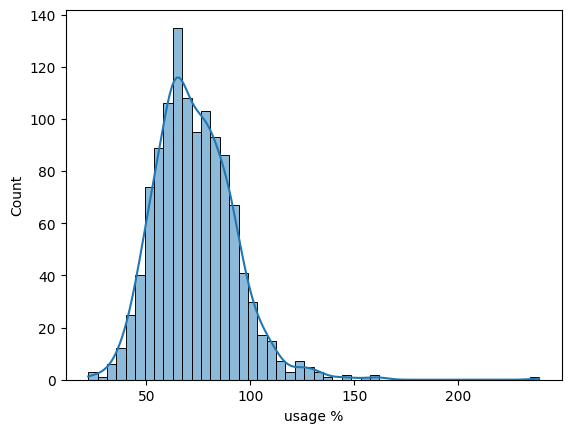

In [576]:
# visualizing the usage %
sns.histplot(data=population_df['usage %'], kde=True)
plt.show()

# We can see that the usage % is normally distributed but there are values where the usage is more than 100% making the school overcrowded 
# On the other hand there are values where the usage is less than 50% making the school underutilized

In [577]:
# Now in the final step we will assign a z-score as per the usage % of the school
# Calculate Z-score for 'usage %'
population_df["z_score"] = zscore(population_df["usage %"])

alpha = 0.5
population_df["population_score"] = round(np.exp(-alpha * population_df['z_score']**2), 2)

# Display summary
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'usage %', 'z_score', 'population_score']]
population_df.head()


,ID,region_name,district_name,school_name,usage %,z_score,population_score
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.168979,0.99
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.375911,0.93
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.429330,0.91
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,-0.207545,0.98
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,-0.233995,0.97


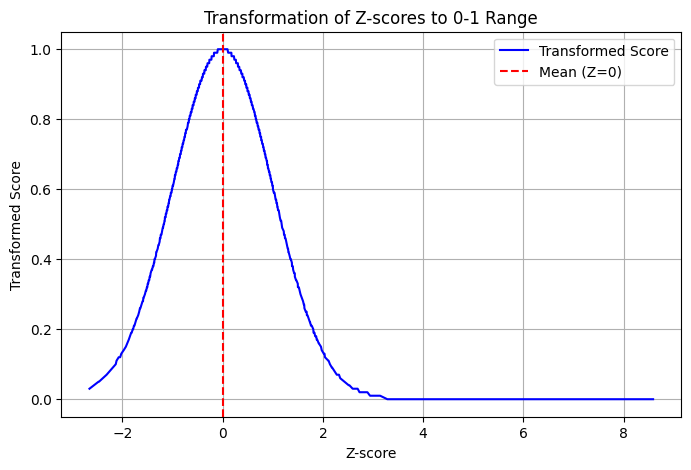

In [578]:
# Generate a range of Z-scores from -4 to 4
z_scores = population_df['z_score']
# Define alpha value for scaling
alpha = 0.5

# Compute the transformed scores
transformed_scores = population_df['population_score']

# Plot the transformation
plt.figure(figsize=(8, 5))
sns.lineplot(x=z_scores, y=transformed_scores, color='blue', label="Transformed Score")
plt.axvline(0, color='red', linestyle='--', label="Mean (Z=0)")
plt.xlabel("Z-score")
plt.ylabel("Transformed Score")
plt.title("Transformation of Z-scores to 0-1 Range")
plt.legend()
plt.grid(True)
plt.show()

In [579]:
print("Min score:", population_df["population_score"].min())
print("Max score:", population_df["population_score"].max())

Min score: 0.0
Max score: 1.0


#### 2. Resources_df

In [580]:
resources_df.head()

,id,Region name,District name,School name,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Availability of drinking water and handwashing facilities in the kitchen,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Source of the heating system,Fuel source for local or improvised heating systems,Availability of water in the school,Source of drinking water supply,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Where is the functioning restroom located in the school?,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Do you think the classrooms are warm during the autumn-winter season?,"Does the school building have a water pipeline, and does water flow through it?"
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,Almost everything is available,Completely absent,Not available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Not available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,Available,Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,Available,"Water is available, but there is no soap","Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the

In [581]:
resources_df.columns

Index(['id', 'Region name', 'District name', 'School name',
       'Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)',
       'Availability of drinking water and handwashing facilities in the kitchen',
       'Is there a generator in the school?',
       'Are there solar panels in the school (above 10 kW)',
       'Source of the heating system',
       'Fuel source for local or improvised heating systems',
       'Availability of water in the school',
       'Source of drinking water supply', 'Type of internet connection',
       'Internet usage',
       'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems',
       'Availability of video surveillance cameras',
       'Availability of public transport stops nearby',
       'Facilities for students with musculoskeletal disorders:',
       'Where is the functioning restroom located in the school?',
       'Availabil

In [582]:
resources_df.rename(columns={"id": "ID",
                            "Region name": "region_name",
                            "District name": "district_name",
                            "School name": "school_name",
                            "Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)": "sports_equipment",
                            "Availability of drinking water and handwashing facilities in the kitchen": "drinking_water",
                            "Is there a generator in the school?": "generator",
                            'Are there solar panels in the school (above 10 kW)': 'solar_panels',
                            'Source of the heating system': 'heating_system',
                            'Fuel source for local or improvised heating systems': 'fuel_source',
                            'Availability of water in the school': 'water',
                            'Source of drinking water supply': 'drinking_water_supply',
                            'Type of internet connection': 'internet_connection',
                            'Internet usage': 'internet_usage',
                            'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems': 'fire_safety',
                            'Availability of video surveillance cameras': 'video_surveillance',
                            'Availability of public transport stops nearby': 'public_transport',
                            'Facilities for students with musculoskeletal disorders': 'musculoskeletal_disorders',
                            'Where is the functioning restroom located in the school?': 'restroom_location',
                            'Availability of doors and partitions in restroom stalls': 'restroom_stalls',
                            'Availability of water and soap for handwashing near restrooms': 'handwashing',
                            'Do you think the restroom is safe for children?': 'restroom_safe',
                            "Do you think there is a connection between the condition of restrooms and students' willingness to attend school?": 'restroom_connection',
                            'Do you think the classrooms are warm during the autumn-winter season?': 'classrooms_warm',
                            'Does the school building have a water pipeline, and does water flow through it?': 'water_pipeline'
                            }, inplace=True)

In [583]:
# Exclude non-categorical columns
exclude_cols = ['ID', 'region_name', 'district_name', 'school_name']
categorical_cols = [col for col in resources_df.columns if col not in exclude_cols]

# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(resources_df[col].unique())


sports_equipment:
['Almost everything is available'
 'Partially available (many items are worn out, missing, or damaged)' 'no']

drinking_water:
['Completely absent' 'Water and sink are available' 'No sink available']

generator:
['Not available' 'Available']

solar_panels:
['Available, providing energy to the school' 'Not available'
 'Installed but not functioning'
 'Available, but it supplies energy to the main grid']

heating_system:
['Local (the heating boiler is located within the school premises)'
 'Centralized (the heating system boiler is not located within the school premises)'
 'Hand-made (burzhuyka) stoves are placed in several rooms of the school']

fuel_source:
['Coal' 'Gas'
 'Centralized (the heating system boiler is not located within the school premises)'
 'other']

water:
['Available and safe to drink'
 'Water is available, but it is not safe for drinking; it is used for technical needs (handwashing, cleaning, watering trees, etc.)'
 'Not available']

drinking_water_s

In [584]:
# Create mappings for each column
column_mappings = {
    'sports_equipment': {
        'Almost everything is available': 1,
        'Partially available (many items are worn out, missing, or damaged)': 0.5,
        'no': 0
    },
    'drinking_water': {
        'Water and sink are available': 1,
        'No sink available': 0.5,
        'Completely absent': 0
    },
    
    'generator': {
        'Available': 1,
        'Not available': 0
    },
    
    'solar_panels': {
        'Available, providing energy to the school': 1,
        'Available, but it supplies energy to the main grid': 0.7,
        'Installed but not functioning': 0.3,
        'Not available': 0
    },
    
    'heating_system': {
        'Local (the heating boiler is located within the school premises)': 1,
        'Centralized (the heating system boiler is not located within the school premises)': 0.8,
        'Hand-made (burzhuyka) stoves are placed in several rooms of the school': 0.3
    },
    
    'fuel_source': {
        'Gas': 1,
        'Centralized (the heating system boiler is not located within the school premises)': 0.8,
        'Coal': 0.5,
        'other': 0.3
    },
    
    'water': {
        'Available and safe to drink': 1,
        'Water is available, but it is not safe for drinking; it is used for technical needs (handwashing, cleaning, watering trees, etc.)': 0.5,
        'Not available': 0
    },
    
    'drinking_water_supply': {
        'Centralized (supplied through pipes from outside the school premises)': 1,
        'Local (a well/artesian source or water tower is located within the school premises)': 0.8,
        'Delivered by truck and stored in a large container (reservoir)': 0.5,
        'Not available': 0
    },
    
    'internet_connection': {
        'By fiber optic or wired cable': 1,
        'By mobile communication': 0.5,
        'Not available at all': 0
    },
    
    'internet_usage': {
        'Used within the scope of lessons': 1,
        'Restricted (only for school administration)': 0.5,
        'Not available at all': 0
    },
    
    'fire_safety': {
        'Available': 1,
        'Partially available': 0.5,
        'Not available': 0
    },
    
    'video_surveillance': {
        'Available both in the yard and inside the building': 1,
        'Cameras are installed but not functioning': 0.3,
        'Not available': 0
    },
    
    'public_transport': {
        'Available, approximately 200 meters away': 1,
        'Available, approximately 500 meters away': 0.7,
        'Not available or very far away': 0
    },
    
    'Facilities for students with musculoskeletal disorders:': {
        'Available': 1,
        'Partially': 0.5,
        'Not available': 0,
        np.nan: 0  # Handling missing values
    },
    
    'restroom_location': {
        'Available in both locations': 1,
        'Inside the building': 0.8,
        'In the yard': 0.4,
        'Not available': 0
    },
    
    'restroom_stalls': {
        'Available': 1,
        'There are barriers, but there are no separate cabins and doors': 0.5,
        'Not available': 0
    },
    
    'handwashing': {
        'Available': 1,
        'Water is available, but there is no soap': 0.5,
        'Not available': 0
    },
    
    'restroom_safe': {
        'Yes, safe': 1,
        "No, it's dangerous": 0,
        "I don't know": 0.5
    },
    
    'restroom_connection': {
        'Yes': 1,
        'No': 0
    },
    
    'classrooms_warm': {
        'Yes, hot': 1,
        'No, cold': 0
    },
    
    'water_pipeline': {
        'Yes, water comes through the tap': 1,
        'Yes, the pipe is laid, but there is no water flow': 0.3,
        'No, there is neither water nor pipes': 0
    }
}

# Function to apply mappings to all columns
def apply_mappings(df, mappings):
    df_transformed = df.copy()
    for column, mapping in mappings.items():
        if column in df.columns:
            df_transformed[column] = df_transformed[column].map(mapping)
    return df_transformed

# Apply the mappings to your dataframe
resources_df_transformed = apply_mappings(resources_df, column_mappings)

# Display the first few rows of transformed data
print("First few rows of transformed data:")
display(resources_df_transformed.head())

# Verify that all values have been properly mapped
print("\nChecking for any unmapped values (will show NaN if any):")
for col in column_mappings.keys():
    if col in resources_df.columns:
        null_count = resources_df_transformed[col].isnull().sum()
        if null_count > 0:
            print(f"{col}: {null_count} unmapped values")

First few rows of transformed data:


,ID,region_name,district_name,school_name,sports_equipment,drinking_water,generator,solar_panels,heating_system,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,Facilities for students with musculoskeletal disorders:,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0



Checking for any unmapped values (will show NaN if any):


Top 10 Schools by Resources Score:


,school_name,region_name,resources_score_normalized
1106,62-сонли умумий ўрта таълим мактаби,Samarkand region,1.000000
426,2-сонли умумий ўрта таълим мактаби,Samarkand region,0.979452
647,72-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.972603
1090,47-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.972603
337,2-сонли ихтисослаштирилган давлат умумтаълим м...,Samarkand region,0.965753
557,106-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.965753
448,4-сонли умумий ўрта таълим мактаби,Samarkand region,0.958904
459,5-сонли умумий ўрта таълим мактаби,Samarkand region,0.958904
1171,158-сонли умумий ўрта таълим мактаби,Samarkand region,0.958904
1177,20-сонли умумий ўрта таълим мактаби,Samarkand region,0.958904



Score Statistics:
count    1261.000000
mean        0.632614
std         0.173251
min         0.000000
25%         0.513699
50%         0.643836
75%         0.767123
max         1.000000
Name: resources_score_normalized, dtype: float64


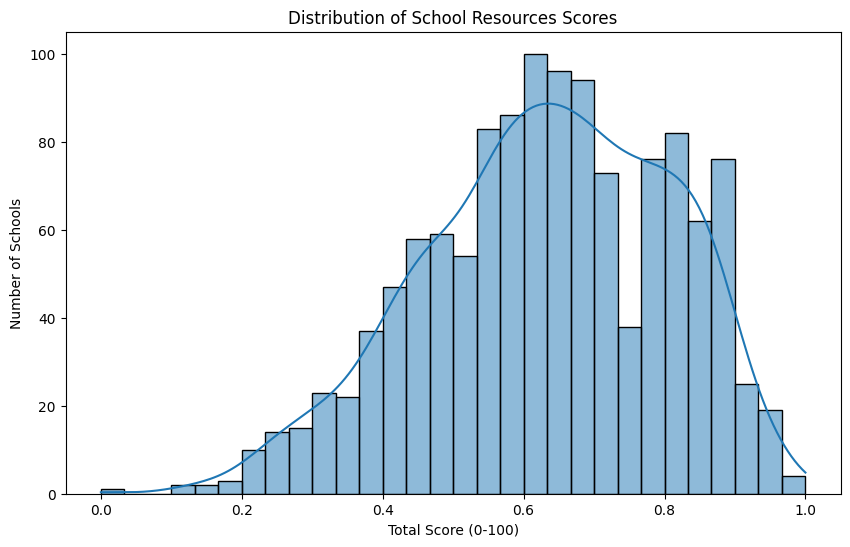


Average Scores by Region:


,mean,count
region_name,,
Samarkand region,0.632614,1261


In [585]:
# Calculate simple sum score
# First, get only the columns we want to sum (excluding ID and name columns)
score_columns = resources_df_transformed.columns.difference(['ID', 'school_name', 'region_name', 'district_name'])

# Calculate total score by summing all columns
resources_df_transformed['total_score'] = resources_df_transformed[score_columns].sum(axis=1)

# Normalize the total score to 0-1 scale for easier interpretation
resources_df_transformed['resources_score_normalized'] = ((resources_df_transformed['total_score'] - resources_df_transformed['total_score'].min()) / 
                                                    (resources_df_transformed['total_score'].max() - resources_df_transformed['total_score'].min()))

# Show top 10 schools
print("Top 10 Schools by Resources Score:")
top_10_schools = resources_df_transformed[['school_name', 'region_name', 'resources_score_normalized']].nlargest(10, 'resources_score_normalized')
display(top_10_schools)

# Basic statistics of the scores
print("\nScore Statistics:")
print(resources_df_transformed['resources_score_normalized'].describe())

# Visualize the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(data=resources_df_transformed, x='resources_score_normalized', bins=30, kde=True)
plt.title('Distribution of School Resources Scores')
plt.xlabel('Total Score (0-100)')
plt.ylabel('Number of Schools')
plt.show()

# Show average scores by region
print("\nAverage Scores by Region:")
regional_scores = resources_df_transformed.groupby('region_name')['resources_score_normalized'].agg(['mean', 'count']).sort_values('mean', ascending=False)
display(regional_scores)

#### 3. Infrastructure_df

In [586]:
infrastructure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 36 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   id                                                                                                                                 1261 non-null   int64 
 1   Region name                                                                                                                        1261 non-null   object
 2   District name                                                                                                                      1261 non-null   object
 3   School name                                                                                  

In [587]:
infrastructure_df.columns

Index(['id', 'Region name', 'District name', 'School name',
       'Enter the type of wall material:', 'Condition of the building walls',
       'Enter the type of roofing material of the building',
       'Condition of the building roof',
       'Condition of windows and frames in classrooms',
       'Condition of the floors in classrooms',
       'Condition of the doors in classrooms',
       'Is the condition of the library satisfactory?',
       'Condition of the gymnasium', 'Condition of the stadium',
       'Condition of the assembly hall', 'Condition of the kitchen',
       'Condition of the internal electrical system',
       'Condition of the lighting system',
       'Condition of the school boiler room',
       'Condition of the internal heating system (pipes and radiators)',
       'Condition of water supply inside the restrooms',
       'Is the restroom connected to the central sewage system?',
       'Are there any issues connecting the indoor restrooms to the sewage syste

In [588]:
column_rename = {
    'id': 'ID',
    'Region name': 'region_name',
    'District name': 'district_name',
    'School name': 'school_name',
    'Enter the type of wall material:': 'wall_material',
    'Condition of the building walls': 'wall_condition',
    'Enter the type of roofing material of the building': 'roof_material',
    'Condition of the building roof': 'roof_condition',
    'Condition of windows and frames in classrooms': 'windows_condition',
    'Condition of the floors in classrooms': 'floor_condition',
    'Condition of the doors in classrooms': 'door_condition',
    'Is the condition of the library satisfactory?': 'library_condition',
    'Condition of the gymnasium': 'gym_condition',
    'Condition of the stadium': 'stadium_condition',
    'Condition of the assembly hall': 'hall_condition',
    'Condition of the kitchen': 'kitchen_condition',
    'Condition of the internal electrical system': 'electrical_system',
    'Condition of the lighting system': 'lighting_system',
    'Condition of the school boiler room': 'boiler_condition',
    'Condition of the internal heating system (pipes and radiators)': 'heating_system',
    'Condition of water supply inside the restrooms': 'restroom_water',
    'Is the restroom connected to the central sewage system?': 'sewage_connection',
    'Are there any issues connecting the indoor restrooms to the sewage system?': 'sewage_issues',
    'Are there any issues connecting the indoor restrooms to the water supply system?': 'water_supply_issues',
    'Are there lights inside the restrooms, and are they safe for children?': 'restroom_lighting',
    'Are there concrete/asphalt pathways between buildings and outdoor restrooms?': 'restroom_pathway',
    'Conditions for dining': 'dining_condition',
    'Is the school perimeter fenced with a boundary wall?': 'boundary_wall',
    'Have any repair or reconstruction works been carried out in the building?': 'repairs_done',
    'Do you consider the building safe during an earthquake?': 'earthquake_safety',
    '(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?': 'distance_to_school',
    'Do you think your school\'s infrastructure meets modern educational requirements?': 'modern_standards',
    'Are you satisfied with the condition of your school?': 'satisfaction',
    'What material are the walls of the outdoor restroom made of?': 'outdoor_restroom_material',
    'What is the condition of the outdoor restroom?': 'outdoor_restroom_condition',
    'What is the condition of the standard (project-based) restroom?': 'indoor_restroom_condition'
}

# Rename the columns
infrastructure_df = infrastructure_df.rename(columns=column_rename)

In [589]:
# Exclude non-categorical columns
exclude_cols = ['ID', 'region_name', 'district_name', 'school_name']
categorical_cols = [col for col in infrastructure_df.columns if col not in exclude_cols]

# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(infrastructure_df[col].unique())


wall_material:
['brick' 'wattle' nan 'concrete' 'stone']

wall_condition:
['In satisfactory condition (no cracks, other flaws or defects)'
 'In unsatisfactory condition (has cracks or other flaws and defects)'
 ' In case of emergency' nan]

roof_material:
['profnastyle' 'slate' nan ' bitumen' 'other']

roof_condition:
['Satisfactory (no cracks or other defects) - no repairs required'
 'Partial repair required (some areas are cracked or have other defects)'
 'Needs to be completely replaced (there are many cracks or other defects)'
 nan]

windows_condition:
['Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required'
 'Partial repair required (some frames do not open or have other defects)'
 'Needs to be completely replaced (almost all frames are either not opening or are worn out)'
 nan
 'Partially in need of repair (some frames do not open or have other defects)']

floor_condition:
['Partially in need of repair (floors in some classrooms are rotten or 

Top 10 Schools by Infrastructure Score:


,school_name,region_name,total_infrastructure_score_normalized
964,55-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.987500
426,2-сонли умумий ўрта таълим мактаби,Samarkand region,0.975000
998,1-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.971875
961,52 -sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.962500
1043,53-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.950000
1168,154-сонли умумий ўрта таълим мактаби,Samarkand region,0.950000
955,47-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.946875
386,47-сонли умумий ўрта таълим мактаби,Samarkand region,0.946875
930,24-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.943750
948,40-sonli umumiy o'rta ta'lim maktabi,Samarkand region,0.943750



Score Statistics:
count    1261.000000
mean        0.683850
std         0.143435
min         0.175000
25%         0.593750
50%         0.709375
75%         0.790625
max         0.987500
Name: total_infrastructure_score_normalized, dtype: float64


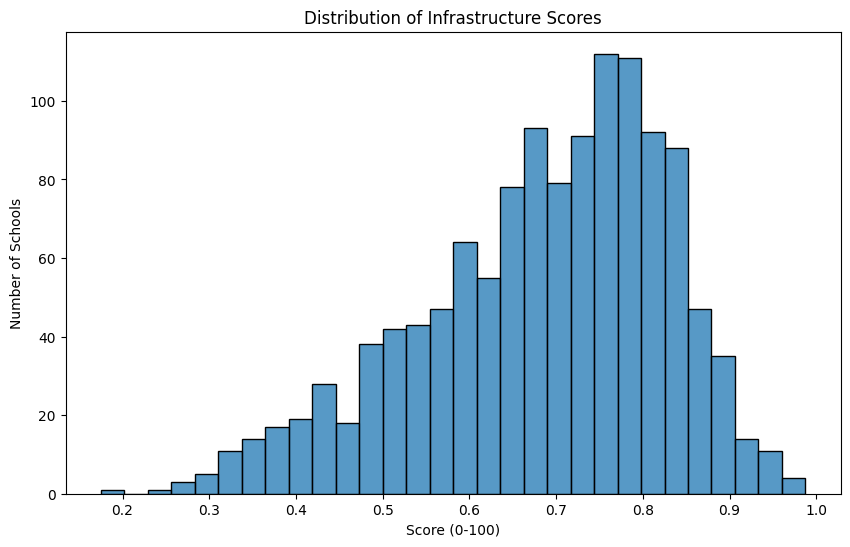

In [590]:
# Create mappings for each column
infrastructure_mappings = {
    'wall_material': {
        'concrete': 1.0,
        'brick': 0.8,
        'stone': 0.7,
        'wattle': 0.4,
        np.nan: 0
    },
    
    'wall_condition': {
        'In satisfactory condition (no cracks, other flaws or defects)': 1.0,
        'In unsatisfactory condition (has cracks or other flaws and defects)': 0.3,
        'In case of emergency': 0,
        np.nan: 0
    },
    
    'roof_material': {
        'profnastyle': 1.0,
        'slate': 0.8,
        'bitumen': 0.6,
        'other': 0.4,
        np.nan: 0
    },
    
    'roof_condition': {
        'Satisfactory (no cracks or other defects) - no repairs required': 1.0,
        'Partial repair required (some areas are cracked or have other defects)': 0.5,
        'Needs to be completely replaced (there are many cracks or other defects)': 0,
        np.nan: 0
    },
    
    'windows_condition': {
        'Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required': 1.0,
        'Partial repair required (some frames do not open or have other defects)': 0.5,
        'Partially in need of repair (some frames do not open or have other defects)': 0.5,
        'Needs to be completely replaced (almost all frames are either not opening or are worn out)': 0,
        np.nan: 0
    },
    
    'floor_condition': {
        'Satisfactory (almost all floors are intact) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floors in some classrooms are rotten or require maintenance)': 0.5,
        'Needs complete replacement (almost all floors are damaged)': 0,
        'No wooden or other types of flooring available at all': 0,
        np.nan: 0
    },
    
    'door_condition': {
        'Satisfactory (almost all doors are present, intact, and functional) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some doors do not open or have other defects)': 0.5,
        'Needs complete replacement (almost all doors have defects and issues)': 0,
        np.nan: 0
    },
    
    'library_condition': {
        'yes': 1.0,
        'Available, but no furniture': 0.5,
        'no': 0,
        'Not available': 0
    },
    
    'gym_condition': {
        'Satisfactory (the floor is not rotten, its covering, frames/windows, ceiling, walls, and fixtures attached to the ceiling or walls are intact) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floor or its covering, frames/windows, ceiling, walls, and fixtures attached to the ceiling or walls have defects)': 0.5,
        'Not available': 0,
        ' Not available': 0
    },
    
    'stadium_condition': {
        'Satisfactory (the surface layer is even, with a drainage path around the football goals) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (the surface layer is uneven, there is no drainage path around the football goals, or there are other defects)': 0.5,
        'Not available': 0
    },
    
    'hall_condition': {
        'Satisfactory (almost all seats are intact, sufficient, and functional, and the stage is in good condition) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some seats have defects or are insufficient, the stage requires repair, or there are other issues)': 0.5,
        'There is an activity hall, but there are no seats': 0.3,
        'Completely absent': 0
    },
    
    'kitchen_condition': {
        'Satisfactory (the condition of the walls, floors, kitchen equipment, and furniture is acceptable) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floor and walls, furniture and equipment are worn out or need maintenance, or there are other defects)': 0.5,
        'There is a cafeteria, but it is not operational': 0.2,
        'There is no cafeteria at all': 0
    },
    
    'electrical_system': {
        'Satisfactory (wires, switches, circuit breakers, and sockets are in working condition) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some wires are disconnected, switches, circuit breakers, and sockets are non-functional)': 0.5,
        'Needs complete replacement (wires are disconnected in most places, switches, circuit breakers, and sockets are non-functional or outdated)': 0
    },
    
    'lighting_system': {
        'Satisfactory (fully modern LED lighting installed)': 1.0,
        'Partially modern lighting installed (some LED lights are in place)': 0.5,
        'No modern LED lighting installed at all': 0
    },
    
    'boiler_condition': {
        'Operational': 1.0,
        'Needs repair or replacement': 0
    },
    
    'heating_system': {
        'Operational (all pipes and radiators are in good condition and provide heat)': 1.0,
        'Needs repair or replacement (some or all pipes and radiators have defects and do not provide heat)': 0
    },
    
    'restroom_water': {
        'Yes, water is available for handwashing and toilet use': 1.0,
        'Yes, there is water available only for handwashing': 0.7,
        'Yes, the pipe is laid, but there is no water flow': 0.3,
        'No, there is neither water nor pipes': 0
    },
    
    'sewage_connection': {
        'Yes, it is connected to the central sewage system and exits through pipes from outside the school': 1.0,
        'There is a septic tank (special) in the school yard': 0.7,
        'There is no sewage system at all': 0
    },
    
    'sewage_issues': {
        'No': 1.0,
        'Yes': 0,
        'There are no restrooms inside the building': 0
    },
    
    'water_supply_issues': {
        'No': 1.0,
        'Yes': 0,
        'There are no restrooms inside the building': 0
    },
    
    'restroom_lighting': {
        'Yes': 1.0,
        'No': 0
    },
    
    'restroom_pathway': {
        'Available': 1.0,
        'Partially available': 0.5,
        'Not available': 0
    },
    
    'dining_condition': {
        'There is a kitchen and a cafeteria': 1.0,
        'There is a kitchen available for preparing hot meals': 0.8,
        'Only a cafeteria is available (there are no facilities for preparing hot meals)': 0.4,
        'There is neither a cafeteria nor a kitchen': 0
    },
    
    'boundary_wall': {
        'Fully fenced': 1.0,
        'Partially available': 0.5,
        'Not fenced': 0
    },
    
    'repairs_done': {
        'Yes, major renovation': 1.0,
        'Yes, reconstruction': 0.8,
        'Yes, current maintenance': 0.6,
        'Not avaible': 0
    },
    
    'earthquake_safety': {
        'Yes, safe': 1.0,
        'I don\'t know': 0.5,
        'No, dangerous': 0,
        np.nan: 0
    },
    
    'distance_to_school': {
        'There is no such problem': 1.0,
        'My school is located in the city': 1.0,
        'Yes, not many (around 20%)': 0.8,
        'Yes, a lot (less than 50%)': 0.5,
        'Yes, a lot (not available in 80% of the areas)': 0
    },
    
    'modern_standards': {
        'yes': 1.0,
        'I don\'t know': 0.5,
        'no': 0
    },
    
    'satisfaction': {
        'I am satisfied': 1.0,
        'I am not satisfied': 0.3,
        'I am extremely dissatisfied': 0
    },
    
    'outdoor_restroom_material': {
        'Reinforced concrete': 1.0,
        'Baked brick': 0.8,
        'Stone': 0.7,
        'Raw brick': 0.5,
        'Wattle': 0.3,
        'wattle': 0.3,
        'Inside the building': 1.0,
        np.nan: 0
    },
    
    'outdoor_restroom_condition': {
        'Standard (constructed based on a design)': 1.0,
        'Customized (made of clay, sponsorship, stone, wood, or straw)': 0.5,
        'Inside the building': 1.0,
        np.nan: 0
    },
    
    'indoor_restroom_condition': {
        'Repaired - satisfactory': 1.0,
        'Needs repair - unsatisfactory': 0.3,
        'In an emergency condition': 0,
        np.nan: 0
    }
}

# Function to apply mappings and calculate total score
def apply_infrastructure_scores(df, mappings):
    df_scored = df.copy()
    
    # Apply mappings to each column
    for column, mapping in mappings.items():
        if column in df.columns:
            df_scored[column] = df_scored[column].map(mapping)
    
    # Calculate total score (sum of all scored columns)
    score_columns = list(mappings.keys())
    df_scored['total_infrastructure_score'] = df_scored[score_columns].sum(axis=1)
    
    # Normalize total score to 0-1 scale
    max_possible_score = len(score_columns)  # Since each column is scored 0-1
    df_scored['total_infrastructure_score_normalized'] = (df_scored['total_infrastructure_score'] / max_possible_score)
    
    return df_scored

# Apply scores to the dataframe
infrastructure_df_scored = apply_infrastructure_scores(infrastructure_df, infrastructure_mappings)

# Display results
print("Top 10 Schools by Infrastructure Score:")
top_10 = infrastructure_df_scored[['school_name', 'region_name', 'total_infrastructure_score_normalized']].nlargest(10, 'total_infrastructure_score_normalized')
display(top_10)

# Basic statistics
print("\nScore Statistics:")
print(infrastructure_df_scored['total_infrastructure_score_normalized'].describe())

# Visualize score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=infrastructure_df_scored, x='total_infrastructure_score_normalized', bins=30)
plt.title('Distribution of Infrastructure Scores')
plt.xlabel('Score (0-100)')
plt.ylabel('Number of Schools')
plt.show()

In [591]:
infrastructure_df_scored.drop(['total_infrastructure_score'], axis=1, inplace=True)
infrastructure_df_scored.head()


,ID,region_name,district_name,school_name,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,total_infrastructure_score_normalized
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,0.712500
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.784375
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.765625
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.743750
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.753125


In [592]:
# Now we can merge all the dataframes
population_df = pd.merge(population_df, resources_df_transformed, on=['ID','region_name', 'district_name', 'school_name'], how='left')
final_df = pd.merge(population_df, infrastructure_df_scored, on=['ID','region_name', 'district_name', 'school_name'], how='left')

In [593]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 63 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       1178 non-null   int64  
 1   region_name                                              1178 non-null   object 
 2   district_name                                            1178 non-null   object 
 3   school_name                                              1178 non-null   object 
 4   usage %                                                  1178 non-null   float64
 5   z_score                                                  1178 non-null   float64
 6   population_score                                         1178 non-null   float64
 7   sports_equipment                                         1178 non-null   float64
 8   drinking_water              

In [594]:
final_df[['wall_condition', 'roof_material', 'earthquake_safety']].isnull().sum()


wall_condition         7
roof_material          4
earthquake_safety    119
dtype: int64

In [595]:
final_df['earthquake_safety'].dropna().unique()
final_df['earthquake_safety'].fillna(final_df['earthquake_safety'].mode()[0], inplace=True)
final_df['earthquake_safety'].isnull().sum()
final_df.dropna(subset=['wall_condition', 'roof_material'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_17900\2959707105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['earthquake_safety'].fillna(final_df['earthquake_safety'].mode()[0], inplace=True)


### Data Wrangling Code

In [596]:
final_df.head()

,ID,region_name,district_name,school_name,usage %,z_score,population_score,sports_equipment,drinking_water,generator,solar_panels,heating_system_x,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,Facilities for students with musculoskeletal disorders:,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline,total_score,resources_score_normalized,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system_y,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,total_infrastructure_score_normalized
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.168979,0.99,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0,15.1,0.643836,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,0.712500
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.375911,0.93,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0,14.4,0.595890,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.784375
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.429330,0.91,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0,15.2,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.765625
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,-0.207545,0.98,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0,16.4,0.732877,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.743750
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,-0.233995,0.97,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0,15.2,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.753125


In [597]:
final_df = final_df[['ID', 'region_name', 'district_name', 'school_name', 'usage %',
        'population_score', 'sports_equipment', 'drinking_water',
       'generator', 'solar_panels', 'heating_system_x', 'fuel_source', 'water',
       'drinking_water_supply', 'internet_connection', 'internet_usage',
       'fire_safety', 'video_surveillance', 'public_transport',
       'Facilities for students with musculoskeletal disorders:',
       'restroom_location', 'restroom_stalls', 'handwashing', 'restroom_safe',
       'restroom_connection', 'classrooms_warm', 'water_pipeline',
        'resources_score_normalized', 'wall_material',
       'wall_condition', 'roof_material', 'roof_condition',
       'windows_condition', 'floor_condition', 'door_condition',
       'library_condition', 'gym_condition', 'stadium_condition',
       'hall_condition', 'kitchen_condition', 'electrical_system',
       'lighting_system', 'boiler_condition', 'heating_system_y',
       'restroom_water', 'sewage_connection', 'sewage_issues',
       'water_supply_issues', 'restroom_lighting', 'restroom_pathway',
       'dining_condition', 'boundary_wall', 'repairs_done',
       'earthquake_safety', 'distance_to_school', 'modern_standards',
       'satisfaction', 'outdoor_restroom_material',
       'outdoor_restroom_condition', 'indoor_restroom_condition',
       'total_infrastructure_score_normalized']]


In [598]:
final_df.rename(columns={
    'ID':'id',
    'region_name': 'region',
    'district_name': 'district',
    'Facilities for students with musculoskeletal disorders:': 'musculoskeletal_disorders_facilities',
    'resources_score_normalized': 'resources_score',
    'total_infrastructure_score_normalized': 'infrastructure_score'
}, inplace=True)

In [599]:
sec_school_df = final_df.copy()

### What all manipulations have you done and insights you found?

Answer Here.

# L-2 Workflow

## Dataset Loading

In [ ]:
hospital_file = r"C:\Users\pc\OneDrive\Documents\Dev_Tools\test_codes\social_infra\excel_files\Hospitals_Samarkand.xlsx"
pre_school_file = r"C:\Users\pc\OneDrive\Documents\Dev_Tools\test_codes\social_infra\excel_files\PreSchools.xlsx"

hospital_raw_df = pd.read_excel(hospital_file)
pre_school_raw_df = pd.read_excel(pre_school_file)


## Hospital Data

### basic_info_collection

In [497]:
display(hospital_raw_df.shape)
display(hospital_raw_df.columns)
display(hospital_raw_df.info())

(280, 55)

Index(['Region name', 'District name', 'Number of branches outside the region',
       'Total land area of the hospital',
       'Land area occupied by buildings and structures',
       'Enter the year of construction of the hospital',
       'If renovated, enter the year of renovation',
       'Total design capacity of the hospital',
       'Available vacant land area on the hospital’s territory for constructing an additional building (approximately in sotih-100 metr square)',
       'Number of hospital buildings (if you have a branch, do not include its buildings)',
       'Number of floors', 'Enter the type of wall material of the building',
       'Condition of the building walls', 'Building foundations',
       'Condition of the concrete slabs (ceilings) between floors',
       'Enter the type of roofing material used for the building',
       'Condition of the building roof',
       'Condition of windows and frames in classrooms',
       'Condition of the floors in hospital',
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 55 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   Region name                                                                                                                              280 non-null    object 
 1   District name                                                                                                                            280 non-null    object 
 2   Number of branches outside the region                                                                                                    280 non-null    int64  
 3   Total land area of the hospital                             

None

### missing_null_values_handling

In [498]:
# checking all the columns that are completely null
total_rows = hospital_raw_df.shape[0]
null_cols = hospital_raw_df.isnull().sum()
null_cols = null_cols[null_cols == total_rows]
"""
Building foundations                                                                280
Condition of the concrete slabs (ceilings) between floors                           280
Are there concrete/asphalt pathways between the buildings and outdoor restrooms?    280
Do you think the restroom is safe for patient?                                      280
Is the pathway to the restroom illuminated with lights and safe for patient?        280
dtype: int64
"""
"""
Now here we can see that these columns are completely dependent on the current situation of the school which means it can only be collected from the source only, 
hence we can not consider them into our analysis so we will drop them right away.
"""

# first let's make a copy of our dataframe to maintain it's originality
hospital_df = hospital_raw_df.copy()
hospital_df = hospital_df.drop(null_cols.index, axis=1)
display(hospital_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 50 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   Region name                                                                                                                              280 non-null    object 
 1   District name                                                                                                                            280 non-null    object 
 2   Number of branches outside the region                                                                                                    280 non-null    int64  
 3   Total land area of the hospital                             

None

### renaming_columns

In [499]:
# we can see that the column names are really long and hard to read hence we will rename the columns for better readability
# first of all le's rename the columns to make them shorter and more readable
column_map = {
    'Region name': 'region',
    'District name': 'district',
    'Number of branches outside the region': 'outside_branches',
    'Total land area of the hospital': 'land_area_total',
    'Land area occupied by buildings and structures': 'land_area_built',
    'Enter the year of construction of the hospital': 'year_built',
    'If renovated, enter the year of renovation': 'year_renovated',
    'Total design capacity of the hospital': 'design_capacity',
    'Available vacant land area on the hospital’s territory for constructing an additional building (approximately in sotih-100 metr square)': 'vacant_land_area',
    'Number of hospital buildings (if you have a branch, do not include its buildings)': 'building_count',
    'Number of floors': 'floors',
    'Enter the type of wall material of the building': 'wall_material',
    'Condition of the building walls': 'wall_condition',
    'Enter the type of roofing material used for the building': 'roof_material',
    'Condition of the building roof': 'roof_condition',
    'Condition of windows and frames in classrooms': 'window_condition',
    'Condition of the floors in hospital': 'floor_condition',
    'Condition of the doors in hospital': 'door_condition',
    'Availability of drinking and hand washing water supply in the toilet': 'toilet_water_supply',
    'Condition of the electricity supply throughout the day': 'electricity_supply',
    'Is there a generator in the hospital?': 'has_generator',
    'Are there solar panels (above 10 kW) in the hospital?': 'has_solar_panels',
    'Condition of the internal electrical system': 'internal_electric_condition',
    'Condition of the lighting system': 'lighting_condition',
    'Source of the heating system': 'heating_source',
    'Condition of the internal heating system (pipes and radiators)': 'heating_condition',
    'Availability of water in the hospital': 'has_water',
    'Source of drinking water supply': 'drinking_water_source',
    'Is the hospital surrounded by a fence wall?': 'has_fence',
    'Type of internet connection': 'internet_type',
    'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems': 'fire_safety',
    'Availability of video surveillance cameras': 'has_cctv',
    'Availability of public transport stops nearby': 'has_transport_nearby',
    'Have repair or reconstruction works been carried out?': 'recent_repairs',
    'Do you consider the building safe during an earthquake?': 'earthquake_safe',
    'Where is the functioning restroom located in the hospital?': 'restroom_location',
    'Condition of the water supply inside the restrooms': 'restroom_water_condition',
    'Is the restroom connected to the central sewage (canalization) system?': 'restroom_has_sewage',
    'Availability of doors and partitions in restroom stalls': 'restroom_doors',
    'Availability of water and soap for handwashing near restrooms': 'restroom_handwash_available',
    'Are there any issues with connecting indoor restrooms to the sewage (wastewater) system?': 'restroom_sewage_issues',
    'Are there any issues with connecting indoor restrooms to the water supply system?': 'restroom_water_issues',
    'Are there lights inside the restrooms, and are they safe for patient?': 'restroom_light_safe',
    'Do you think the hospital are warm during the autumn-winter season?': 'is_warm_in_winter',
    'Has a water pipeline been installed inside the hospital building, and does water flow through it?': 'has_water_pipeline',
    'Are you satisfied with the condition of your hospital?': 'satisfaction',
    'Total_employee_number': 'total_staff',
    'Number of medical personnel': 'medical_staff',
    'Number of visitors to the hospital': 'visitor_count',
    'Hospital bed capacity': 'bed_capacity'
}
hospital_df.rename(columns=column_map, inplace=True)

### adding_unique_identifier

In [500]:
# as we know that each row of this df represents a different hospital we need to give each row a hospital name so that it can be uniquely identified
hospital_df.insert(2, 'hospital_name', [f'Hospital_{i:03d}' for i in range(1, len(hospital_df) + 1)])

### scoring_categorical_columns

In [501]:
# getting numerical columns on the basis of 'number'
numerical_cols = hospital_df.select_dtypes(include=['number']).columns.tolist()

# getting categorical columns (object, category, or boolean types)
categorical_cols = hospital_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# let's check all the unique values in our hospital_df's categorical columns
# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(hospital_df[col].unique())


region:
['Samarkand']

district:
['Kattakurgan city' 'Bulungur district' 'Jomboy district'
 'Narpay district' 'Oqdaryo district' 'Kattakurgan district'
 'Qushrabat district' 'Nurabad district' 'Samarkand city'
 'Payarik district' 'Urgut district' 'Paxtachi district'
 'Pastargom district' 'Taylak district' 'Ishtihan district'
 'Samarkand district']

hospital_name:
['Hospital_001' 'Hospital_002' 'Hospital_003' 'Hospital_004'
 'Hospital_005' 'Hospital_006' 'Hospital_007' 'Hospital_008'
 'Hospital_009' 'Hospital_010' 'Hospital_011' 'Hospital_012'
 'Hospital_013' 'Hospital_014' 'Hospital_015' 'Hospital_016'
 'Hospital_017' 'Hospital_018' 'Hospital_019' 'Hospital_020'
 'Hospital_021' 'Hospital_022' 'Hospital_023' 'Hospital_024'
 'Hospital_025' 'Hospital_026' 'Hospital_027' 'Hospital_028'
 'Hospital_029' 'Hospital_030' 'Hospital_031' 'Hospital_032'
 'Hospital_033' 'Hospital_034' 'Hospital_035' 'Hospital_036'
 'Hospital_037' 'Hospital_038' 'Hospital_039' 'Hospital_040'
 'Hospital_041' 'Hospit

In [502]:
value_score_map = {
    'wall_material': {
        'Concrete': 1.0,
        'Brick': 0.8,
        'Stone': 0.6,
        'Wattle': 0.3
    },
    'wall_condition': {
        'In satisfactory condition (no cracks, other flaws or defects)': 1.0,
        'In unsatisfactory condition (has cracks or other flaws and defects)': 0.4,
        'In case of emergency': 0.0
    },
    'roof_material': {
        'profnastyle': 1.0,
        'slate': 0.8,
        'bitumen': 0.6,
        'other': 0.3
    },
    'roof_condition': {
        'Satisfactory (no cracks or other defects) - no repairs required': 1.0,
        'Partial repair required (some areas are cracked or have other defects)': 0.5,
        'Needs to be completely replaced (there are many cracks or other defects)': 0.1
    },
    'window_condition': {
        'Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required': 1.0,
        'Partial repair required (some frames do not open or have other defects)': 0.5,
        'Needs to be completely replaced (almost all frames are either not opening or are worn out)': 0.1,
        np.nan: 0
    },
    'floor_condition': {
        'Satisfactory (almost all floors intact) - i.e. no repairs required': 1.0,
        'Partial renovation required (floors in some classrooms are rotten or in need of renovation)': 0.5,
        'Floors made of wood or other materials are generally not available': 0.3,
        ' Needs complete replacement (almost all floors are damaged)': 0.1,
        np.nan: 0
    },
    'door_condition': {
        'Satisfactory (almost all doors are present, intact, and open) - i.e. no repairs required': 1.0,
        'Partial repair required (some doors do not open or there are other defects)': 0.5,
        'Needs complete replacement (almost all doors have flaws and defects)': 0.1,
        np.nan: 0
    },
    'toilet_water_supply': {
        ' There is water and a sink.': 1.0,
        'there is no sink': 0.5,
        'Not at all': 0.0
    },
    'electricity_supply': {
        'Almost does not turn off during the day': 1.0,
        'It goes out at certain times during the day (1-2 times)': 0.5,
        'There is no electricity supply at all.': 0.0
    },
    'has_generator': {
        'Available': 1.0,
        'Not available': 0.0
    },
    'has_solar_panels': {
        'Available, gives energy to school': 1.0,
        'Yes, but it transfers energy to the public grid': 0.7,
        'Installed but not working': 0.3,
        'no': 0.0
    },
    'internal_electric_condition': {
        'Satisfactory (wires, switches, circuit breakers, sockets in working condition) - i.e. no repairs required': 1.0,
        'Partial repair required (some wires are disconnected, switches, automatic machines, sockets do not work)': 0.5,
        'It needs to be completely replaced (wires are disconnected almost everywhere, switches, automatic machines, sockets do not work or are worn out)': 0.0
    },
    'lighting_condition': {
        'Satisfactory (fully modern electric lights LED installed)': 1.0,
        'Partially modern electric lights are LED installed': 0.6,
        'Modern electric lights in general are not LED-equipped.': 0.3
    },
    'heating_source': {
        'Local (heating boiler room is located on school premises)': 1.0,
        'Centralized (Heating system-boiler room not located on school premises)': 0.7,
        'Hand-made stoves (burjuyka) are placed in several rooms of the school.': 0.3
    },
    'heating_condition': {
        'In working condition (all pipes and radiators are in good condition and heat up)': 1.0,
        'Repairs are required or need to be replaced (some or all pipes and radiators are defective and not heating)': 0.0
    },
    'has_water': {
        'Available, drink it': 1.0,
        'There is water, but it is not drinkable, it is used for technical needs (washing hands, cleaning, watering trees, etc.)': 0.5,
        'No': 0.0
    },
    'drinking_water_source': {
        'Local (well/artesian well or water tower located on school grounds)': 1.0,
        'Centralized (comes from outside the school, in a pipeline)': 0.7,
        'It is brought in by truck and filled into a large container (reservoir).': 0.4,
        'No': 0.0
    },
    'has_fence': {
        ' fully wrapped': 1.0,
        'partially available': 0.5,
        'unwrapped': 0.0
    },
    'internet_type': {
        'Through glass fiber or wire cable': 1.0,
        'By mobile communication': 0.6,
        'Not at all': 0.0
    },
    'fire_safety': {
        'Available': 1.0,
        'Partially available': 0.5,
        'Not available': 0.0
    },
    'has_cctv': {
        'There is in the yard and inside the building.': 1.0,
        "There are cameras but they don't work.": 0.5,
        'No': 0.0
    },
    'has_transport_nearby': {
        'Yes, about 200 meters away.': 1.0,
        'Yes, about 500 meters away.': 0.5,
        'No, or too far': 0.0
    },
    'recent_repairs': {
        'Yes, major repairs': 1.0,
        'Yes, reconstruction': 0.7,
        'Yes, current repair': 0.5,
        'No': 0.0
    },
    'earthquake_safe': {
        'Yes, safe': 1.0,
        "I don't know": 0.5,
        'No, dangerous': 0.0
    },
    'restroom_location': {
        'There are two places.': 1.0,
        'Inside the building': 0.8,
        'In the yard': 0.4,
        'Not available': 0.0
    },
    'restroom_water_condition': {
        'Yes, water is available for handwashing and toilet use': 1.0,
        'Yes, there is water available only for handwashing': 0.6,
        'Yes, the pipe is laid, but there is no water flow': 0.4,
        'No, there is neither water nor pipes': 0.0
    },
    'restroom_has_sewage': {
        'Yes, it is connected to the central sewage system and exits through pipes from outside the kindgarten': 1.0,
        'There is a septic tank (special) in the school yard': 0.6,
        'There is no sewage system at all': 0.0
    },
    'restroom_doors': {
        'Available': 1.0,
        'There are barriers, but there are no separate cabins and doors': 0.5,
        'No': 0.0
    },
    'restroom_handwash_available': {
        'Available': 1.0,
        'Water is available, but there is no soap': 0.5,
        'No': 0.0
    },
    'restroom_sewage_issues': {
        'No': 1.0,
        'There are no restrooms inside the building': 0.5,
        'Yes': 0.0
    },
    'restroom_water_issues': {
        'No': 1.0,
        'There are no restrooms inside the building': 0.5,
        'Yes': 0.0
    },
    'restroom_light_safe': {
        'Yes': 1.0,
        'No': 0.0
    },
    'is_warm_in_winter': {
        'Yes, hot': 1.0,
        'No, cold': 0.0
    },
    'has_water_pipeline': {
        'Yes, from crane water come': 1.0,
        'Yes, the pipe is laid, but there is no water flow': 0.4,
        'No, there is neither water nor pipes': 0.0
    },
    'satisfaction': {
        'I am satisfied': 1.0,
        'I am not satisfied': 0.5,
        'I am extremely dissatisfied': 0.0
    }
}

for col, mapping in value_score_map.items():
    if col in hospital_df.columns:
        hospital_df[col] = hospital_df[col].map(mapping)

### scoring_numerical_columns

#### static_numerical_columns

In [503]:
# let's first check the description of the numerical columns
hospital_df[numerical_cols].describe()

"""
Columns like:-
    - outside_branches
    - building_count
    - floors
seem to have static numerical values, let's check them out.
"""
for col in ['outside_branches', 'building_count', 'floors']:
    print(f"\n{col}:")
    print(hospital_df[col].unique())

"""
outside_branches:
[0 3 1 2]

building_count:
[1 3 2]

floors:
[1 2 3 4]

As these values are having static values we can directly assign scores to thenm as per their value.
"""
value_score_map_num = {
    'outside_branches': {
        3 : 1.0,
        2 : 0.8,
        1 : 0.6,
        0 : 0,
        np.nan : 0
    },
    'building_count': {
        3 : 1.0,
        2 : 0.6,
        1 : 0.3,
        np.nan : 0
    },
    'floors': {
        4 : 1.0,
        3 : 0.8,
        2 : 0.6,
        1 : 0.3,
        np.nan : 0
    },
}

for col, mapping in value_score_map_num.items():
    if col in hospital_df.columns:
        hospital_df[col] = hospital_df[col].map(mapping)



outside_branches:
[0 3 1 2]

building_count:
[1 3 2]

floors:
[1 2 3 4]


#### range_numerical_columns

In [504]:
# firstly we have numerical columns that tells about the information of the land area of the hospital
land_area_cols = ['land_area_total', 'land_area_built', 'vacant_land_area']

# we will have to drop those rows where land_area_total < land_area_build
hospital_df = hospital_df[hospital_df['land_area_total'] > hospital_df['land_area_built']]

"""
in this the vacant_land_area in some values is simply the land_area_total - land_area_built,
but this is not the case with every values probably due to some hidden reason. 
Hence to solve this we will create 2 columns 1 is [% of land_area_built] i.e. [land_area_built]/[land_area_total]
and the 2nd is the [% of vacant_land_area] i.e. [vacant_land_area]/[land_area_total].
This will allow us to handle both the cases separately and we will be able to get both insights and will be able to score them accordingly.
"""

hospital_df['land_area_built'] = np.where(
    hospital_df['land_area_total'] != 0,
    (hospital_df['land_area_built'] / hospital_df['land_area_total']).round(2),
    0.0  # or np.nan, depending on what you prefer
)

hospital_df['vacant_land_area'] = np.where(
    hospital_df['land_area_total'] != 0,
    (hospital_df['vacant_land_area'] / hospital_df['land_area_total']).round(2),
    0.0
)

# now we have the % of vacant_land_area and the build_area using this we can assign scores considering a threshold
# let's check the data of these values separately
hospital_df[['hospital_name'] + land_area_cols].head()

,hospital_name,land_area_total,land_area_built,vacant_land_area
0,Hospital_001,53,0.34,0.66
1,Hospital_002,3520,0.50,0.00
2,Hospital_003,4355,0.25,0.28
3,Hospital_004,4232,0.23,0.00
5,Hospital_006,3305,0.00,0.00


In [505]:
#now as we have the % of build area and vacant aread we can simply drop the land_area_total
hospital_df.drop('land_area_total', axis=1, inplace=True)

In [506]:
# Assign scores based on land utilization:
# - If built area is between 30% and 60% of total land, score = 1 (optimal utilization)
# - If built area < 30%, score = 0.5 (underutilized)
# - If built area > 60%, score = 0.3 (overbuilt)
# - If vacant land area > 40%, score = 1 (good for expansion)
# - If vacant land area between 20%-40%, score = 0.7
# - If vacant land area < 20%, score = 0.3

def land_built_score(x):
    if x < 0.3:
        return 0.5
    elif x <= 0.6:
        return 1.0
    else:
        return 0.3

def vacant_land_score(x):
    if x > 0.4:
        return 1.0
    elif x >= 0.2:
        return 0.7
    else:
        return 0.3

hospital_df['land_area_built'] = hospital_df['land_area_built'].apply(land_built_score)
hospital_df['vacant_land_area'] = hospital_df['vacant_land_area'].apply(vacant_land_score)


In [507]:
# Assume current year
current_year = datetime.now().year

# Use year_renovated if available, otherwise year_built
hospital_df['effective_year'] = hospital_df[['year_renovated', 'year_built']].max(axis=1)
hospital_df['building_age'] = current_year - hospital_df['effective_year']

# Define a scoring function: newer buildings get higher scores
def age_score(age):
    if pd.isnull(age):
        return 0
    elif age <= 5:
        return 1.0
    elif age <= 10:
        return 0.8
    elif age <= 20:
        return 0.6
    elif age <= 40:
        return 0.4
    else:
        return 0.2

hospital_df['age_score'] = hospital_df['building_age'].apply(age_score)

In [508]:
# now that we have assigned the age_score we can drop all the non required columns
hospital_df.drop(hospital_df[['effective_year', 'building_age', 'year_built', 'year_renovated']], axis=1, inplace=True)
hospital_df.head()

,region,district,hospital_name,outside_branches,land_area_built,design_capacity,vacant_land_area,building_count,floors,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,toilet_water_supply,electricity_supply,has_generator,has_solar_panels,internal_electric_condition,lighting_condition,heating_source,heating_condition,has_water,drinking_water_source,has_fence,internet_type,fire_safety,has_cctv,has_transport_nearby,recent_repairs,earthquake_safe,restroom_location,restroom_water_condition,restroom_has_sewage,restroom_doors,restroom_handwash_available,restroom_sewage_issues,restroom_water_issues,restroom_light_safe,is_warm_in_winter,has_water_pipeline,satisfaction,total_staff,medical_staff,visitor_count,bed_capacity,age_score
0,Samarkand,Kattakurgan city,Hospital_001,0.0,1.0,50,1.0,0.3,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.0,0.5,1.0,0.5,1.0,0.4,0.6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,119.0,107.0,0.0,28.0,1.0
1,Samarkand,Bulungur district,Hospital_002,0.0,1.0,120,0.3,0.3,0.6,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.7,1.0,1.0,0.7,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,65.0,50.0,250.0,10.0,1.0
2,Samarkand,Jomboy district,Hospital_003,1.0,0.5,60,0.7,1.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.0,19.0,10183.0,6.0,1.0
3,Samarkand,Narpay district,Hospital_004,0.0,0.5,120,0.3,0.3,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0
5,Samarkand,Kattakurgan district,Hospital_006,0.6,0.5,125,0.3,0.6,0.3,0.3,0.4,0.8,0.5,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.6,1.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.5,1.0,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,35.0,29.0,75.0,8.0,0.6


In [509]:
# now let's work with the rest of the numerical columns
pop_cols = ['design_capacity', 'total_staff', 'medical_staff', 'visitor_count', 'bed_capacity']

hospital_df[['hospital_name'] + pop_cols].head()

# Fill missing values
hospital_df[['total_staff', 'medical_staff', 'visitor_count', 'bed_capacity']] = (
    hospital_df[['total_staff', 'medical_staff', 'visitor_count', 'bed_capacity']].fillna(0)
)

# Avoid division by zero
hospital_df['visitor_count'] = hospital_df['visitor_count'].replace(0, 1)

# Create base-normalized ratios
hospital_df['staff_per_visitor'] = hospital_df['total_staff'] / hospital_df['visitor_count']
hospital_df['medstaff_per_visitor'] = hospital_df['medical_staff'] / hospital_df['visitor_count']
hospital_df['beds_per_visitor'] = hospital_df['bed_capacity'] / hospital_df['visitor_count']

# Optional: Add log transform if there's skew
hospital_df['staff_per_visitor'] = np.log1p(hospital_df['staff_per_visitor'])
hospital_df['medstaff_per_visitor'] = np.log1p(hospital_df['medstaff_per_visitor'])
hospital_df['medstaff_per_visitor'] = np.log1p(hospital_df['beds_per_visitor'])

# Min-Max normalize the log-ratios to get scores
scaler = MinMaxScaler()
hospital_df[['total_staff', 'medical_staff', 'bed_capacity']] = scaler.fit_transform(
    hospital_df[['staff_per_visitor', 'medstaff_per_visitor', 'medstaff_per_visitor']]
)

# Final population score (average of all 3 ratio scores)
hospital_df['population_score'] = hospital_df[['total_staff', 'medical_staff', 'bed_capacity']].mean(axis=1).round(2)


In [510]:
hospital_df.drop(['staff_per_visitor','medstaff_per_visitor', 'beds_per_visitor', 'visitor_count', 'design_capacity'], axis=1, inplace=True)

In [511]:
hospital_df['infrastructure_score'] = hospital_df[['outside_branches',
       'land_area_built', 'vacant_land_area',
       'building_count', 'floors', 'wall_material', 'wall_condition',
       'roof_material', 'roof_condition', 'window_condition',
       'floor_condition', 'door_condition',
       'recent_repairs', 'earthquake_safe', 'age_score']].mean(axis=1).round(2)

hospital_df['resources_score'] = hospital_df[['toilet_water_supply',
       'electricity_supply', 'has_generator', 'has_solar_panels',
       'internal_electric_condition', 'lighting_condition', 'heating_source',
       'heating_condition', 'has_water', 'drinking_water_source', 'has_fence',
       'internet_type', 'fire_safety', 'has_cctv', 'has_transport_nearby', 'restroom_location',
       'restroom_water_condition', 'restroom_has_sewage', 'restroom_doors',
       'restroom_handwash_available', 'restroom_sewage_issues',
       'restroom_water_issues', 'restroom_light_safe', 'is_warm_in_winter',
       'has_water_pipeline', 'satisfaction']].mean(axis=1).round(2)

## Pre School Data

### basic_info_collection

In [512]:
display(pre_school_raw_df.shape)
display(pre_school_raw_df.columns)
display(pre_school_raw_df.info())

(491, 75)

Index(['Region name', 'District name', 'Kindergarten name',
       'Number of branches outside the region',
       'Number of groups in the I kindergarten',
       'Total land area of the kindgarten',
       'Land area occupied by buildings and structures',
       'External sweeping area', 'Internal cleaning area',
       'Garden and flowerbed area', 'Leased garden area',
       'Enter the year of construction of the preschool educational institution',
       'If renovated, enter the year of renovation',
       'Total design capacity of the preschool educational institution (number of student places according to the approved construction project or passport, enter the number in digits)',
       'Available vacant land area on the preschool educational institution’s territory for constructing an additional educational building (approximately in sotix)',
       'Number of educational buildings (if you have a branch, do not include its buildings)',
       'Number of floors', 'Enter the typ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 75 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Region name                                                                                                                                                                       491 non-null    object 
 1   District name                                                                                                                                                                     491 non-null    object 
 2   Kindergarten name                                             

None

### missing_null_values_handling

In [513]:
# checking all the columns that are completely null
total_rows = pre_school_raw_df.shape[0]
null_cols = pre_school_raw_df.isnull().sum()
null_cols = null_cols[null_cols == total_rows]
"""
Building foundations                                                                                                  491
Condition of the concrete slabs (ceilings) between floors                                                             491
Are there concrete/asphalt pathways between the buildings and outdoor restrooms?                                      491
Do you think the restroom is safe for children?                                                                       491
Do you think there is a connection between the condition of restrooms and children's willingness to attend school?    491
Is the pathway to the restroom illuminated with lights and safe for children?                                         491
Conditions for dining                                                                                                 491
dtype: int64
"""
"""
Now here we can see that these columns are completely dependent on the current situation of the school which means it can only be collected from the source only, 
hence we can not consider them into our analysis so we will drop them right away.
"""

# first let's make a copy of our dataframe to maintain it's originality
pre_school_df = pre_school_raw_df.copy()
pre_school_df = pre_school_df.drop(null_cols.index, axis=1).reset_index(drop=True)

# we have to drop the comments column as well
pre_school_df.drop('Comments', axis=1, inplace=True)
display(pre_school_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 67 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Region name                                                                                                                                                                       491 non-null    object 
 1   District name                                                                                                                                                                     491 non-null    object 
 2   Kindergarten name                                             

None

### renaming_columns

In [514]:
column_rename_dict = {
    'Region name': 'region',
    'District name': 'district',
    'Kindergarten name': 'kindergarten_name',
    'Number of branches outside the region': 'outside_branches',
    'Number of groups in the I kindergarten': 'group_count',
    'Total land area of the kindgarten': 'land_area_total',
    'Land area occupied by buildings and structures': 'land_area_built',
    'External sweeping area': 'external_sweeping_area',
    'Internal cleaning area': 'internal_cleaning_area',
    'Garden and flowerbed area': 'garden_area',
    'Leased garden area': 'leased_garden_area',
    'Enter the year of construction of the preschool educational institution': 'year_built',
    'If renovated, enter the year of renovation': 'year_renovated',
    'Total design capacity of the preschool educational institution (number of student places according to the approved construction project or passport, enter the number in digits)': 'design_capacity',
    'Available vacant land area on the preschool educational institution’s territory for constructing an additional educational building (approximately in sotix)': 'vacant_land_area',
    'Number of educational buildings (if you have a branch, do not include its buildings)': 'educational_building_count',
    'Number of floors': 'floor_count',
    'Enter the type of wall material of the building': 'wall_material',
    'Condition of the building walls': 'wall_condition',
    'Enter the type of roofing material used for the building': 'roof_material',
    'Condition of the building roof': 'roof_condition',
    'Condition of windows and frames in classrooms': 'window_condition',
    'Condition of the floors in classrooms': 'floor_condition',
    'Condition of the doors in classrooms': 'door_condition',
    'Availability of sports equipment and inventory according to standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)': 'sports_equipment_available',
    'Condition of the assembly hall': 'assembly_hall_condition',
    'Condition of the kitchen': 'kitchen_condition',
    'Availability of drinking and handwashing water supply in the kitchen': 'kitchen_water_supply',
    'Condition of the electricity supply throughout the day': 'electricity_condition',
    'Is there a generator in the preschool educational institution?': 'has_generator',
    'Are there solar panels (above 10 kW) in the preschool educational institution?': 'has_solar_panels',
    'Condition of the internal electrical system': 'internal_electrical_condition',
    'Condition of the lighting system': 'lighting_condition',
    'Source of the heating system': 'heating_source',
    'Fuel source for local or improvised heating systems': 'heating_fuel_source',
    "Condition of the preschool educational institution's boiler room": 'boiler_room_condition',
    'Condition of the internal heating system (pipes and radiators)': 'internal_heating_condition',
    'Availability of water in the preschool educational institution': 'water_availability',
    'Source of drinking water supply': 'drinking_water_source',
    'Is the preschool educational institution surrounded by a fenced wall?': 'has_fence',
    'Type of internet connection': 'internet_type',
    'Internet usage': 'internet_usage',
    'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems': 'fire_safety_available',
    'Availability of video surveillance cameras': 'has_cctv',
    'Availability of public transport stops nearby': 'has_public_transport_nearby',
    'Conditions for students with musculoskeletal disorders': 'accessible_for_disabled',
    'Have repair or reconstruction works been carried out?': 'repaired_or_reconstructed',
    'Total': 'total_students',
    'Boys': 'boys',
    'Girls': 'girls',
    'Do you consider the building safe during an earthquake?': 'earthquake_safety',
    'Where is the functioning restroom located in the preschool educational institution?': 'restroom_location',
    'Condition of the water supply inside the restrooms': 'restroom_water_condition',
    'Is the restroom connected to the central sewage (canalization) system?': 'restroom_connected_to_sewage',
    'Total.1': 'staff_total',
    'Men': 'staff_men',
    'Women': 'staff_women',
    'Availability of doors and partitions in restroom stalls': 'restroom_doors_partitions',
    'Availability of water and soap for handwashing near restrooms': 'restroom_handwash_water_soap',
    'Are there any issues with connecting indoor restrooms to the sewage (wastewater) system?': 'restroom_sewage_issues',
    'Are there any issues with connecting indoor restrooms to the water supply system?': 'restroom_water_issues',
    'Are there lights inside the restrooms, and are they safe for children?': 'restroom_lighting_safe',
    'Do you think the classrooms are warm during the autumn-winter season?': 'classrooms_warm_in_winter',
    'Has a water pipeline been installed inside the preschool educational institution building, and does water flow through it?': 'indoor_pipeline_installed',
    'THIS QUESTION IS MAINLY FOR RURAL SCHOOLS!\nAre children in your microdistrict forced to walk more than 3 km one way to reach your school?': 'children_walk_more_than_3km',
    'Do you think your school\'s infrastructure meets modern educational requirements?': 'meets_modern_infrastructure',
    'Are you satisfied with the condition of your preschool educational institution?': 'satisfied_with_condition'
}

pre_school_df.rename(columns=column_rename_dict, inplace=True)
pre_school_df.shape

(491, 67)

### modifying_unique_school_names

In [515]:
pre_school_df['kindergarten_name'] = pre_school_df['kindergarten_name'].astype(str)

for i in range(len(pre_school_df)):
    pre_school_df.loc[i, 'kindergarten_name'] = 'kindergarten_'+pre_school_df['kindergarten_name'][i]

### scoring_categorical_columns

In [516]:
# getting numerical columns on the basis of 'number'
numerical_cols = pre_school_df.select_dtypes(include=['number']).columns.tolist()

# getting categorical columns (object, category, or boolean types)
categorical_cols = pre_school_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# let's check all the unique values in our pre_school_df's categorical columns
# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(pre_school_df[col].unique())


region:
['Samarkand']

district:
['Ishtihan district' 'Jomboy district' 'Bulungur district'
 'Kattakurgan district' 'Nurabad district' 'Narpay district'
 'Payarik district' 'Oqdaryo district' 'Taylak district'
 'Qushrabat district' 'Samarkand district' 'Pastargom district'
 'Paxtachi district' 'Samarkand city' 'Urgut district' 'Kattakurgan city']

kindergarten_name:
['kindergarten_1' 'kindergarten_2' 'kindergarten_5' 'kindergarten_7'
 'kindergarten_9' 'kindergarten_10' 'kindergarten_12' 'kindergarten_13'
 'kindergarten_14' 'kindergarten_15' 'kindergarten_16' 'kindergarten_18'
 'kindergarten_19' 'kindergarten_20' 'kindergarten_21' 'kindergarten_22'
 'kindergarten_23' 'kindergarten_25' 'kindergarten_27' 'kindergarten_28'
 'kindergarten_29' 'kindergarten_30' 'kindergarten_31' 'kindergarten_37'
 'kindergarten_38' 'kindergarten_39' 'kindergarten_40' 'kindergarten_42'
 'kindergarten_43' 'kindergarten_44' 'kindergarten_45' 'kindergarten_47'
 'kindergarten_50' 'kindergarten_54' 'kindergarten_

In [517]:
category_score_mappings = {
    'wall_material': {
        'Concrete': 1.0, 'Brick': 0.8, 'Stone': 0.7, 'Wattle': 0.4, np.nan: 0
    },
    'wall_condition': {
        'In satisfactory condition (no cracks, other flaws or defects)': 1.0,
        'In unsatisfactory condition (has cracks or other flaws and defects)': 0.5,
        'In case of emergency': 0.0, np.nan: 0
    },
    'roof_material': {
        'profnastyle': 1.0, 'slate': 0.8, 'bitumen': 0.7, 'other': 0.5, np.nan: 0
    },
    'roof_condition': {
        'Satisfactory (no cracks or other defects) - no repairs required': 1.0,
        'Partial repair required (some areas are cracked or have other defects)': 0.5,
        'Needs to be completely replaced (there are many cracks or other defects)': 0.0,
        np.nan: 0
    },
    'window_condition': {
        'Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required': 1.0,
        'Partial repair required (some frames do not open or have other defects)': 0.5,
        'Needs to be completely replaced (almost all frames are either not opening or are worn out)': 0.0,
        np.nan: 0
    },
    'floor_condition': {
        'Satisfactory (almost all floors intact) - i.e. no repairs required': 1.0,
        'Partial renovation required (floors in some classrooms are rotten or in need of renovation)': 0.5,
        'Floors made of wood or other materials are generally not available': 0.2,
        ' Needs complete replacement (almost all floors are damaged)': 0.0,
        np.nan: 0
    },
    'door_condition': {
        'Satisfactory (almost all doors are present, intact, and open) - i.e. no repairs required': 1.0,
        'Partial repair required (some doors do not open or there are other defects)': 0.5,
        'Needs complete replacement (almost all doors have flaws and defects)': 0.0,
        np.nan: 0
    },
    'sports_equipment_available': {
        'Almost everything is there': 1.0,
        'Partially available (many things are outdated, lost, broken)': 0.5,
        'no': 0.0
    },
    'assembly_hall_condition': {
        'Satisfactory (almost all seats are intact, sufficient and working, the stage is intact) - i.e. no repairs are required': 1.0,
        'Partial repair required (some seats are missing or missing, the stage needs repair or there are other defects)': 0.5,
        'There is a function room, but no seats.': 0.2,
        'Not at all': 0.0
    },
    'kitchen_condition': {
        'Satisfactory (The condition of walls and floors, kitchen appliances and furniture is satisfactory) - i.e. no repairs are required': 1.0,
        'Partial renovation required (floors and walls, furniture and appliances are worn or in need of repair or other defects)': 0.5,
        'There is a kitchen, but it is not working.': 0.2,
        ' There is no kitchen at all.': 0.0
    },
    'kitchen_water_supply': {
        ' There is water and a sink.': 1.0,
        'there is no sink': 0.5,
        'Not at all': 0.0
    },
    'electricity_condition': {
        'Almost does not turn off during the day': 1.0,
        'It goes out at certain times during the day (1-2 times)': 0.5,
        'There is no electricity supply at all.': 0.0
    },
    'has_generator': {
        'Available': 1.0,
        'Not available': 0.0
    },
    'has_solar_panels': {
        'Available, gives energy to school': 1.0,
        'Yes, but it transfers energy to the public grid': 0.8,
        'Installed but not working': 0.3,
        'no': 0.0
    },
    'internal_electrical_condition': {
        'Satisfactory (wires, switches, circuit breakers, sockets in working condition) - i.e. no repairs required': 1.0,
        'Partial repair required (some wires are disconnected, switches, automatic machines, sockets do not work)': 0.5,
        'It needs to be completely replaced (wires are disconnected almost everywhere, switches, automatic machines, sockets do not work or are worn out)': 0.0
    },
    'lighting_condition': {
        'Satisfactory (fully modern electric lights LED installed)': 1.0,
        'Partially modern electric lights are LED installed': 0.5,
        'Modern electric lights in general are not LED-equipped.': 0.2
    },
    'heating_source': {
        'Local (heating boiler room is located on school premises)': 1.0,
        'Centralized (Heating system-boiler room not located on school premises)': 0.8,
        'Hand-made stoves (burjuyka) are placed in several rooms of the school.': 0.4
    },
    'heating_fuel_source': {
        'Gas': 1.0,
        ' Coal': 0.7,
        'Other': 0.5,
        'Centralized (Heating system-boiler room not located on school premises)': 0.9
    },
    'boiler_room_condition': {
        'In working condition': 1.0,
        'Repair required or replacement required': 0.0
    },
    'internal_heating_condition': {
        'In working condition (all pipes and radiators are in good condition and heat up)': 1.0,
        'Repairs are required or need to be replaced (some or all pipes and radiators are defective and not heating)': 0.0
    },
    'water_availability': {
        'Available, drink it': 1.0,
        'There is water, but it is not drinkable, it is used for technical needs (washing hands, cleaning, watering trees, etc.)': 0.5,
        'No': 0.0
    },
    'drinking_water_source': {
        'Local (well/artesian well or water tower located on school grounds)': 1.0,
        'Centralized (comes from outside the school, in a pipeline)': 0.8,
        'It is brought in by truck and filled into a large container (reservoir).': 0.5,
        'No': 0.0
    },
    'has_fence': {
        ' fully wrapped': 1.0,
        'partially available': 0.5,
        'unwrapped': 0.0
    },
    'internet_type': {
        'Through glass fiber or wire cable': 1.0,
        'By mobile communication': 0.5,
        'Not at all': 0.0
    },
    'internet_usage': {
        'Uses within the lesson': 1.0,
        'Restricted (school administration only)': 0.5,
        'Not at all': 0.0
    },
    'fire_safety_available': {
        'Available': 1.0,
        'Partially available': 0.5,
        'Not available': 0.0
    },
    'has_cctv': {
        'There is in the yard and inside the building.': 1.0,
        "There are cameras but they don't work.": 0.4,
        'No': 0.0
    },
    'has_public_transport_nearby': {
        'Yes, about 200 meters away.': 1.0,
        'Yes, about 500 meters away.': 0.8,
        'No, or too far': 0.0
    },
    'accessible_for_disabled': {
        'Yes': 1.0,
        'partially': 0.5,
        'No': 0.0
    },
    'repaired_or_reconstructed': {
        'Yes, major repairs': 1.0,
        'Yes, reconstruction': 0.8,
        'Yes, current repair': 0.6,
        'No': 0.0
    },
    'earthquake_safety': {
        'Yes, safe': 1.0,
        'I don\'t know': 0.5,
        'No, dangerous': 0.0
    },
    'restroom_location': {
        'Inside the building': 1.0,
        'There are two places.': 0.8,
        'In the yard': 0.4,
        'Not available': 0.0
    },
    'restroom_water_condition': {
        'Yes, water is available for handwashing and toilet use': 1.0,
        'Yes, there is water available only for handwashing': 0.5,
        'Yes, the pipe is laid, but there is no water flow': 0.3,
        'No, there is neither water nor pipes': 0.0
    },
    'restroom_connected_to_sewage': {
        'Yes, it is connected to the central sewage system and exits through pipes from outside the kindgarten': 1.0,
        'There is a septic tank (special) in the school yard': 0.5,
        'There is no sewage system at all': 0.0
    },
    'restroom_doors_partitions': {
        'Available': 1.0,
        'There are barriers, but there are no separate cabins and doors': 0.5,
        'No': 0.0
    },
    'restroom_handwash_water_soap': {
        'Available': 1.0,
        'Water is available, but there is no soap': 0.5,
        'No': 0.0
    },
    'restroom_sewage_issues': {
        'No': 1.0,
        'Yes': 0.0,
        'There are no restrooms inside the building': 0.2
    },
    'restroom_water_issues': {
        'No': 1.0,
        'Yes': 0.0,
        'There are no restrooms inside the building': 0.2
    },
    'restroom_lighting_safe': {
        'Yes': 1.0,
        'No': 0.0
    },
    'classrooms_warm_in_winter': {
        'Yes, hot': 1.0,
        'No, cold': 0.0
    },
    'indoor_pipeline_installed': {
        'Yes, from crane water come': 1.0,
        'Yes, the pipe is laid, but there is no water flow': 0.5,
        'No, there is neither water nor pipes': 0.0
    },
    'children_walk_more_than_3km': {
        'There is no such problem': 1.0,
        'Yes, not many (around 20%)': 0.7,
        'Yes, a lot (less than 50%)': 0.4,
        'Yes, a lot (less than 80%)': 0.2,
        'In city down kindgarten': 0.9
    },
    'meets_modern_infrastructure': {
        'yes': 1.0,
        "I don't know": 0.5,
        'no': 0.0
    },
    'satisfied_with_condition': {
        'I am satisfied': 1.0,
        'I am not satisfied': 0.3,
        'I am extremely dissatisfied': 0.0
    }
}

# Function to apply mappings to all columns
def apply_mappings(df, mappings):
    df_transformed = df.copy()
    for column, mapping in mappings.items():
        if column in df.columns:
            df_transformed[column] = df_transformed[column].map(mapping)
    return df_transformed

pre_school_df = apply_mappings(pre_school_df, category_score_mappings)
pre_school_df.head()

,region,district,kindergarten_name,outside_branches,group_count,land_area_total,land_area_built,external_sweeping_area,internal_cleaning_area,garden_area,leased_garden_area,year_built,year_renovated,design_capacity,vacant_land_area,educational_building_count,floor_count,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,sports_equipment_available,assembly_hall_condition,kitchen_condition,kitchen_water_supply,electricity_condition,has_generator,has_solar_panels,internal_electrical_condition,lighting_condition,heating_source,heating_fuel_source,boiler_room_condition,internal_heating_condition,water_availability,drinking_water_source,has_fence,internet_type,internet_usage,fire_safety_available,has_cctv,has_public_transport_nearby,accessible_for_disabled,repaired_or_reconstructed,total_students,boys,girls,earthquake_safety,restroom_location,restroom_water_condition,restroom_connected_to_sewage,staff_total,staff_men,staff_women,restroom_doors_partitions,restroom_handwash_water_soap,restroom_sewage_issues,restroom_water_issues,restroom_lighting_safe,classrooms_warm_in_winter,indoor_pipeline_installed,children_walk_more_than_3km,meets_modern_infrastructure,satisfied_with_condition
0,Samarkand,Ishtihan district,kindergarten_1,0,4,53,18,5,6,3,0,1985,2024.0,50,35,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.0,0.8,0.5,1.0,80,43,37,0.5,0.8,0.3,0.5,6,3,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,Samarkand,Jomboy district,kindergarten_2,0,4,3520,1760,645,550,565,0,1960,2021.0,120,0,1,2,0.8,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.8,0.7,1.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,100,40,60,1.0,0.8,1.0,0.5,3,1,2,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Samarkand,Bulungur district,kindergarten_5,3,3,4355,1088,100,267,2999,0,2022,2022.0,60,1200,3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,0.8,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,60,34,26,1.0,0.8,0.5,0.5,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
3,Samarkand,Kattakurgan district,kindergarten_7,0,4,4232,971,594,0,0,0,1938,2023.0,120,2,1,2,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,105,56,49,1.0,1.0,1.0,1.0,0,0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.9,1.0,1.0
4,Samarkand,Nurabad district,kindergarten_9,1,4,25,581,12,581,3,0,2023,2023.0,90,0,1,2,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.8,0.5,0.8,115,115,51,0.5,0.8,1.0,1.0,1,1,1,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0


### scoring_numerical_columns

#### static_numerical_columns

In [518]:
# let's first check the description of the numerical columns
pre_school_df[numerical_cols].describe()

"""
Columns like:-
    - outside_branches
    - group_count
    - educational_building_count
    - floor_count
seem to have static numerical values, let's check them out.
"""
for col in ['outside_branches', 'group_count', 'educational_building_count', 'floor_count']:
    print(f"\n{col}:")
    print(pre_school_df[col].unique())

"""
outside_branches:
[0 3 1 2]

educational_building_count:
[1 3 2]

floor_count:
[1 2 3 4]

group_count:
[ 4  3  5 20  6  7  8 10 11  9 30  2 14 12  1 28 25 40 18 13 22]

As these values are having static values we can directly assign scores to thenm as per their value.
"""

value_score_map_num = {
    'outside_branches': {
        3: 1.0,
        2: 0.8,
        1: 0.6,
        0: 0,
        np.nan: 0
    },
    'educational_building_count': {
        3: 1.0,
        2: 0.6,
        1: 0.3,
        np.nan: 0
    },
    'floor_count': {
        4: 1.0,
        3: 0.8,
        2: 0.6,
        1: 0.3,
        np.nan: 0
    }
}

# Define a separate function for group_count scoring since it has ranges
def score_group_count(x):
    if pd.isnull(x):
        return 0
    elif x >= 20:
        return 1.0
    elif x >= 15:
        return 0.8
    elif x >= 10:
        return 0.6
    elif x >= 5:
        return 0.4
    else:
        return 0.2

# Apply the mappings for fixed value columns
for col, mapping in value_score_map_num.items():
    if col in pre_school_df.columns:
        pre_school_df[col] = pre_school_df[col].map(mapping)

# Apply the scoring function for group_count
pre_school_df['group_count'] = pre_school_df['group_count'].apply(score_group_count)


outside_branches:
[0 3 1 2]

group_count:
[ 4  3  5 20  6  7  8 10 11  9 30  2 14 12  1 28 25 40 18 13 22]

educational_building_count:
[1 3 2]

floor_count:
[1 2 3 4]


### range_numerical_columns

In [519]:
# firstly we have numerical columns that tells about the information of the land area of the hospital
land_area_cols = ['land_area_total', 'land_area_built', 'vacant_land_area']

# we will have to drop those rows where land_area_total < land_area_build
pre_school_df = pre_school_df[pre_school_df['land_area_total'] > pre_school_df['land_area_built']]

"""
in this the vacant_land_area in some values is simply the land_area_total - land_area_built,
but this is not the case with every values probably due to some hidden reason. 
Hence to solve this we will create 2 columns 1 is [% of land_area_built] i.e. [land_area_built]/[land_area_total]
and the 2nd is the [% of vacant_land_area] i.e. [vacant_land_area]/[land_area_total].
This will allow us to handle both the cases separately and we will be able to get both insights and will be able to score them accordingly.
"""

pre_school_df['land_area_built'] = np.where(
    pre_school_df['land_area_total'] != 0,
    (pre_school_df['land_area_built'] / pre_school_df['land_area_total']).round(2),
    0.0  # or np.nan, depending on what you prefer
)

pre_school_df['vacant_land_area'] = np.where(
    pre_school_df['land_area_total'] != 0,
    (pre_school_df['vacant_land_area'] / pre_school_df['land_area_total']).round(2),
    0.0
)

# now we have the % of vacant_land_area and the build_area using this we can assign scores considering a threshold
# let's check the data of these values separately
pre_school_df[['kindergarten_name'] + land_area_cols].head()

,kindergarten_name,land_area_total,land_area_built,vacant_land_area
0,kindergarten_1,53,0.34,0.66
1,kindergarten_2,3520,0.50,0.00
2,kindergarten_5,4355,0.25,0.28
3,kindergarten_7,4232,0.23,0.00
5,kindergarten_10,3305,0.00,0.00


In [520]:
#now as we have the % of build area and vacant aread we can simply drop the land_area_total
pre_school_df.drop('land_area_total', axis=1, inplace=True)

In [521]:
# Assign scores based on land utilization:
# - If built area is between 30% and 60% of total land, score = 1 (optimal utilization)
# - If built area < 30%, score = 0.5 (underutilized)
# - If built area > 60%, score = 0.3 (overbuilt)
# - If vacant land area > 40%, score = 1 (good for expansion)
# - If vacant land area between 20%-40%, score = 0.7
# - If vacant land area < 20%, score = 0.3

def land_built_score(x):
    if x < 0.3:
        return 0.5
    elif x <= 0.6:
        return 1.0
    else:
        return 0.3

def vacant_land_score(x):
    if x > 0.4:
        return 1.0
    elif x >= 0.2:
        return 0.7
    else:
        return 0.3

pre_school_df['land_area_built'] = pre_school_df['land_area_built'].apply(land_built_score)
pre_school_df['vacant_land_area'] = pre_school_df['vacant_land_area'].apply(vacant_land_score)

In [522]:
area_cols = ['external_sweeping_area',
 'internal_cleaning_area',
 'garden_area',
 'leased_garden_area']

# Define scoring functions for each area column
def external_sweeping_area_score(x):
    # Example: higher area is better, normalize between 0 and 1
    if pd.isnull(x):
        return 0
    elif x >= 1000:
        return 1.0
    elif x >= 500:
        return 0.8
    elif x >= 100:
        return 0.6
    elif x > 0:
        return 0.3
    else:
        return 0

def internal_cleaning_area_score(x):
    # Example: higher area is better, normalize between 0 and 1
    if pd.isnull(x):
        return 0
    elif x >= 1000:
        return 1.0
    elif x >= 500:
        return 0.8
    elif x >= 100:
        return 0.6
    elif x > 0:
        return 0.3
    else:
        return 0

def garden_area_score(x):
    # Example: higher area is better, normalize between 0 and 1
    if pd.isnull(x):
        return 0
    elif x >= 1000:
        return 1.0
    elif x >= 500:
        return 0.8
    elif x >= 100:
        return 0.6
    elif x > 0:
        return 0.3
    else:
        return 0

def leased_garden_area_score(x):
    # Example: higher area is better, normalize between 0 and 1
    if pd.isnull(x):
        return 0
    elif x >= 1000:
        return 1.0
    elif x >= 500:
        return 0.8
    elif x >= 100:
        return 0.6
    elif x > 0:
        return 0.3
    else:
        return 0

# Apply the scoring functions to each column
pre_school_df['external_sweeping_area'] = pre_school_df['external_sweeping_area'].apply(external_sweeping_area_score)
pre_school_df['internal_cleaning_area'] = pre_school_df['internal_cleaning_area'].apply(internal_cleaning_area_score)
pre_school_df['garden_area'] = pre_school_df['garden_area'].apply(garden_area_score)
pre_school_df['leased_garden_area'] = pre_school_df['leased_garden_area'].apply(leased_garden_area_score)

pre_school_df[['kindergarten_name'] + area_cols].head()

,kindergarten_name,external_sweeping_area,internal_cleaning_area,garden_area,leased_garden_area
0,kindergarten_1,0.3,0.3,0.3,0.0
1,kindergarten_2,0.8,0.8,0.8,0.0
2,kindergarten_5,0.6,0.6,1.0,0.0
3,kindergarten_7,0.8,0.0,0.0,0.0
5,kindergarten_10,0.3,0.3,0.3,0.0


In [523]:
# Assume current year
current_year = datetime.now().year

# Use year_renovated if available, otherwise year_built
pre_school_df['effective_year'] = pre_school_df[['year_renovated', 'year_built']].max(axis=1)
pre_school_df['building_age'] = current_year - pre_school_df['effective_year']

# Define a scoring function: newer buildings get higher scores
def age_score(age):
    if pd.isnull(age):
        return 0
    elif age <= 5:
        return 1.0
    elif age <= 10:
        return 0.8
    elif age <= 20:
        return 0.6
    elif age <= 40:
        return 0.4
    else:
        return 0.2

pre_school_df['age_score'] = pre_school_df['building_age'].apply(age_score)
pre_school_df.drop(pre_school_df[['effective_year', 'building_age', 'year_built', 'year_renovated']], axis=1, inplace=True)

pre_school_df.head()

,region,district,kindergarten_name,outside_branches,group_count,land_area_built,external_sweeping_area,internal_cleaning_area,garden_area,leased_garden_area,design_capacity,vacant_land_area,educational_building_count,floor_count,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,sports_equipment_available,assembly_hall_condition,kitchen_condition,kitchen_water_supply,electricity_condition,has_generator,has_solar_panels,internal_electrical_condition,lighting_condition,heating_source,heating_fuel_source,boiler_room_condition,internal_heating_condition,water_availability,drinking_water_source,has_fence,internet_type,internet_usage,fire_safety_available,has_cctv,has_public_transport_nearby,accessible_for_disabled,repaired_or_reconstructed,total_students,boys,girls,earthquake_safety,restroom_location,restroom_water_condition,restroom_connected_to_sewage,staff_total,staff_men,staff_women,restroom_doors_partitions,restroom_handwash_water_soap,restroom_sewage_issues,restroom_water_issues,restroom_lighting_safe,classrooms_warm_in_winter,indoor_pipeline_installed,children_walk_more_than_3km,meets_modern_infrastructure,satisfied_with_condition,age_score
0,Samarkand,Ishtihan district,kindergarten_1,0.0,0.2,1.0,0.3,0.3,0.3,0.0,50,1.0,0.3,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.0,0.8,0.5,1.0,80,43,37,0.5,0.8,0.3,0.5,6,3,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,Samarkand,Jomboy district,kindergarten_2,0.0,0.2,1.0,0.8,0.8,0.8,0.0,120,0.3,0.3,0.6,0.8,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.8,0.7,1.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,100,40,60,1.0,0.8,1.0,0.5,3,1,2,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Samarkand,Bulungur district,kindergarten_5,1.0,0.2,0.5,0.6,0.6,1.0,0.0,60,0.7,1.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,0.8,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,60,34,26,1.0,0.8,0.5,0.5,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
3,Samarkand,Kattakurgan district,kindergarten_7,0.0,0.2,0.5,0.8,0.0,0.0,0.0,120,0.3,0.3,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,105,56,49,1.0,1.0,1.0,1.0,0,0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.9,1.0,1.0,1.0
5,Samarkand,Narpay district,kindergarten_10,0.6,0.4,0.5,0.3,0.3,0.3,0.0,125,0.3,0.6,0.3,0.4,0.5,0.8,0.5,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.0,0.0,0.0,0.5,1.0,0.7,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.5,0.0,124,63,61,0.5,0.8,0.3,0.0,6,3,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.7,0.5,1.0,0.6


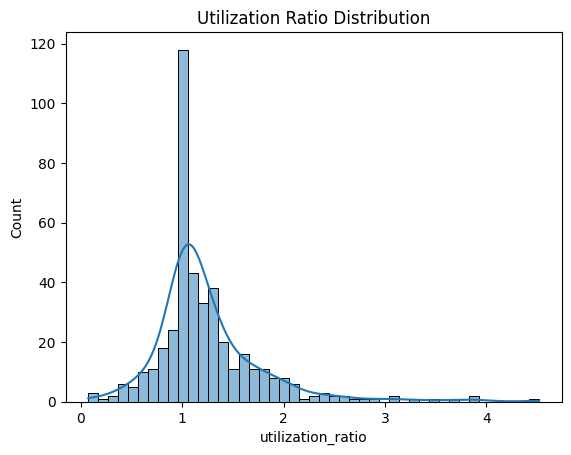

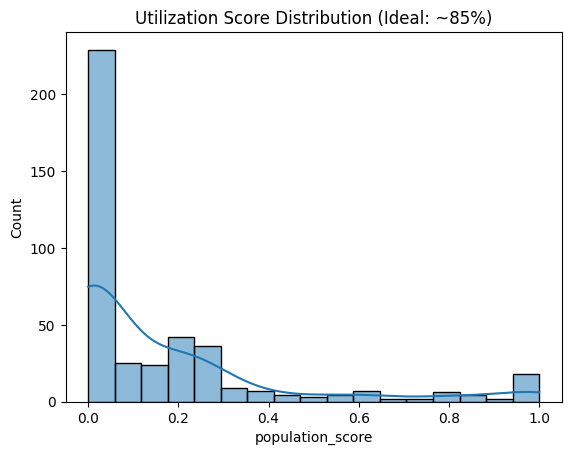

In [524]:

# --- 1. Define relevant population columns
pop_cols = ['design_capacity', 'total_students', 'boys', 'girls', 'staff_total', 'staff_men', 'staff_women']

# --- 2. Fill missing values with 0
pre_school_df[pop_cols] = pre_school_df[pop_cols].fillna(0)

# --- 3. Filter out schools with zero design capacity (to avoid invalid division)
pre_school_df = pre_school_df[pre_school_df['design_capacity'] > 0]

# --- 4. Calculate total population (students + staff)
pre_school_df['total_population'] = pre_school_df['total_students'] + pre_school_df['staff_total']

# --- 5. Calculate utilization ratio (used capacity)
pre_school_df['utilization_ratio'] = pre_school_df['total_population'] / pre_school_df['design_capacity']

# --- 6. Assign score based on how close utilization is to ideal (85%)
# Higher score if utilization is near 85%, penalize under- and over-utilization
ideal_utilization = 0.85  # ideal occupancy is 85% of design capacity
std_dev = 0.1  # smaller values = stricter scoring

pre_school_df['population_score'] = np.exp(-0.5 * ((pre_school_df['utilization_ratio'] - ideal_utilization) / std_dev) ** 2).round(2)

# --- 8. Plot distributions
sns.histplot(pre_school_df['utilization_ratio'], kde=True)
plt.title("Utilization Ratio Distribution")
plt.show()

sns.histplot(pre_school_df['population_score'], kde=True)
plt.title("Utilization Score Distribution (Ideal: ~85%)")
plt.show()



In [525]:
# dropping unnecessary columns

pre_school_df.head()
pre_school_df.drop(['boys', 'girls', 'staff_men', 'staff_women'], axis=1, inplace=True)

#### 📊 Population Utilization Scoring for Pre-Schools

This logic evaluates how effectively a pre-school utilizes its **available design capacity**, factoring in both **students and staff**. The aim is to **reward schools operating near optimal capacity** while allowing room for **future growth**.

---

#### 🔑 Key Logic & Steps

##### 1. 🧼 Null Handling
- Missing values in population-related fields are **replaced with `0`** to ensure accurate computation.

##### 2. 👨‍👩‍👧‍👦 Total Population
- Calculated as: total_population = total_students + staff_total

##### 3. 📏 Utilization Ratio
- Defined as: utilization_ratio = total_population / design_capacity

##### 4. 🎯 Ideal Utilization Benchmark
- **Ideal ratio = 85% (0.85)**
- Schools operating around this benchmark are considered **most efficient**.

##### 5. 📈 Gaussian Scoring Function
- A **Gaussian function** centered at **85% utilization** is applied.
- This gives a **score between 0 and 1**, where:
- `1.0` → **Perfectly utilized with room for growth**
- `< 1.0` → Penalized for being **underutilized or overcrowded**

##### 6. 🏷️ Optional Labeling
- Based on the score, schools can be categorized as:
- ✅ **Ideal**
- ⚠️ **Acceptable**
- ❌ **Needs Review**

#### ✅ Benefits

- Encourages **balanced usage** of school infrastructure.
- Discourages **overcrowding** and **wasted capacity**.
- Supports **data-driven planning** for future expansion.


In [526]:
pre_school_df.columns

Index(['region', 'district', 'kindergarten_name', 'outside_branches',
       'group_count', 'land_area_built', 'external_sweeping_area',
       'internal_cleaning_area', 'garden_area', 'leased_garden_area',
       'design_capacity', 'vacant_land_area', 'educational_building_count',
       'floor_count', 'wall_material', 'wall_condition', 'roof_material',
       'roof_condition', 'window_condition', 'floor_condition',
       'door_condition', 'sports_equipment_available',
       'assembly_hall_condition', 'kitchen_condition', 'kitchen_water_supply',
       'electricity_condition', 'has_generator', 'has_solar_panels',
       'internal_electrical_condition', 'lighting_condition', 'heating_source',
       'heating_fuel_source', 'boiler_room_condition',
       'internal_heating_condition', 'water_availability',
       'drinking_water_source', 'has_fence', 'internet_type', 'internet_usage',
       'fire_safety_available', 'has_cctv', 'has_public_transport_nearby',
       'accessible_for_disa

In [527]:
pre_school_df['infrastructure_score'] = pre_school_df[['outside_branches',
       'group_count', 'land_area_built', 'external_sweeping_area',
       'internal_cleaning_area', 'garden_area', 'leased_garden_area',
       'vacant_land_area', 'educational_building_count',
       'floor_count', 'wall_material', 'wall_condition', 'roof_material',
       'roof_condition', 'window_condition', 'floor_condition',
       'door_condition', 'assembly_hall_condition', 'repaired_or_reconstructed', 'earthquake_safety', 'meets_modern_infrastructure',
       'satisfied_with_condition', 'age_score']].mean(axis=1).round(2)

pre_school_df['resources_score'] = pre_school_df[['sports_equipment_available',
        'kitchen_condition', 'kitchen_water_supply',
        'electricity_condition', 'has_generator', 'has_solar_panels',
        'internal_electrical_condition', 'lighting_condition', 'heating_source',
        'heating_fuel_source', 'boiler_room_condition',
        'internal_heating_condition', 'water_availability',
        'drinking_water_source', 'has_fence', 'internet_type', 'internet_usage',
        'fire_safety_available', 'has_cctv', 'has_public_transport_nearby',
        'accessible_for_disabled', 'restroom_location',
       'restroom_water_condition', 'restroom_connected_to_sewage',
       'restroom_doors_partitions',
       'restroom_handwash_water_soap', 'restroom_sewage_issues',
       'restroom_water_issues', 'restroom_lighting_safe',
       'classrooms_warm_in_winter', 'indoor_pipeline_installed',
       'children_walk_more_than_3km', 'satisfied_with_condition']].mean(axis=1).round(2)

In [528]:
pre_school_df.to_csv('pre_school_df.csv', index=False)

# ML Model Implementation

## hospital_prediction

### location_mapping

In [529]:
hospital_df['latitude'] = hospital_df['district'].map({
    'Kattakurgan city': 39.89889,
    'Bulungur district': 39.7573054,
    'Jomboy district': 39.69889,
    'Narpay district': 39.9223,
    'Kattakurgan district': 39.89716,
    'Qushrabat district': 40.3333,
    'Nurabad district': 39.6100912,
    'Samarkand city': 39.65417,
    'Payarik district': 39.98917,
    'Urgut district': 39.4022,
    'Paxtachi district': 39.9167,     # approx center
    'Pastargom district': 39.65,      # approx
    'Taylak district': 39.6575,          # no precise data
    'Ishtihan district': 39.8371,        # no precise data
    'Oqdaryo district': 39.9092,         # no precise data
    'Samarkand district': 39.65417
})

hospital_df['longitude'] = hospital_df['district'].map({
    'Kattakurgan city': 66.25611,
    'Bulungur district': 67.27287,
    'Jomboy district': 67.09333,
    'Narpay district': 65.925,
    'Kattakurgan district': 66.27242,
    'Qushrabat district': 66.5000,
    'Nurabad district': 66.29622,
    'Samarkand city': 66.95972,
    'Payarik district': 66.84583,
    'Urgut district': 67.24310,
    'Paxtachi district': 66.0,
    'Pastargom district': 67.20,
    'Taylak district': 67.2353,
    'Ishtihan district': 66.4843,
    'Oqdaryo district': 67.0916,
    'Samarkand district': 66.95972
})

### need_category

In [530]:
# Define percentiles
low_threshold = 0.30
high_threshold = 0.60

# Compute the thresholds for each score
resources_low = hospital_df['resources_score'].quantile(low_threshold)
resources_high = hospital_df['resources_score'].quantile(high_threshold)

infra_low = hospital_df['infrastructure_score'].quantile(low_threshold)
infra_high = hospital_df['infrastructure_score'].quantile(high_threshold)

population_low = hospital_df['population_score'].quantile(low_threshold)
population_high = hospital_df['population_score'].quantile(high_threshold)

# Define the function for categorization
def classify_school(row):
    if (
        row['resources_score'] <= resources_low or
        row['infrastructure_score'] <= infra_low or
        row['population_score'] <= population_low
    ):
        return 'RED'  # Urgent Need
    
    elif (
        row['resources_score'] >= resources_high and
        row['infrastructure_score'] >= infra_high and
        row['population_score'] >= population_high
    ):
        return 'GREEN'  # Least Need
    
    else:
        return 'YELLOW'  # Moderate Need

# Apply classification
hospital_df['need_category'] = hospital_df.apply(classify_school, axis=1)

# Print category distribution
print(hospital_df['need_category'].value_counts())

need_category
RED       140
YELLOW     63
GREEN      35
Name: count, dtype: int64


### ml_workflow

#### encoding and data_prep

In [531]:
# Drop 'school_name' from features (it's a primary key)
X = hospital_df.drop(columns=["hospital_name", "need_category"])

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=["region", "district"], drop_first=True)

# Encode the target variable using Label Encoding
le = LabelEncoder()
y = le.fit_transform(hospital_df["need_category"])

# Verify encoding
display(X.head())
display(y[:5])

,outside_branches,land_area_built,vacant_land_area,building_count,floors,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,toilet_water_supply,electricity_supply,has_generator,has_solar_panels,internal_electric_condition,lighting_condition,heating_source,heating_condition,has_water,drinking_water_source,has_fence,internet_type,fire_safety,has_cctv,has_transport_nearby,recent_repairs,earthquake_safe,restroom_location,restroom_water_condition,restroom_has_sewage,restroom_doors,restroom_handwash_available,restroom_sewage_issues,restroom_water_issues,restroom_light_safe,is_warm_in_winter,has_water_pipeline,satisfaction,total_staff,medical_staff,bed_capacity,age_score,population_score,infrastructure_score,resources_score,latitude,longitude,district_Ishtihan district,district_Jomboy district,district_Kattakurgan city,district_Kattakurgan district,district_Narpay district,district_Nurabad district,district_Oqdaryo district,district_Pastargom district,district_Paxtachi district,district_Payarik district,district_Qushrabat district,district_Samarkand city,district_Samarkand district,district_Taylak district,district_Urgut district
0,0.0,1.0,1.0,0.3,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.0,0.5,1.0,0.5,1.0,0.4,0.6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.750177,0.591055,0.591055,1.0,0.64,0.81,0.64,39.898890,66.25611,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,1.0,0.3,0.3,0.6,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.7,1.0,1.0,0.7,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.036214,0.006884,0.006884,1.0,0.02,0.77,0.81,39.757305,67.27287,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1.0,0.5,0.7,1.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000415,0.000103,0.000103,1.0,0.00,0.90,0.94,39.698890,67.09333,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.0,0.5,0.3,0.3,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.00,0.77,0.84,39.922300,65.92500,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,0.6,0.5,0.3,0.6,0.3,0.3,0.4,0.8,0.5,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.6,1.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.5,1.0,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.060013,0.017790,0.017790,0.6,0.03,0.46,0.50,39.897160,66.27242,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


array([1, 2, 1, 1, 1])

#### train_test_split

In [532]:
# Splitting data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### model_1

In [533]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Make predictions for the entire dataset
y_pred_final = rf_model.predict(X)

# Convert numerical predictions back to categorical labels (RED, YELLOW, GREEN)
hospital_df["predicted_need_Category"] = le.inverse_transform(y_pred_final)

# Save the entire dataset with predictions for Power BI
hospital_df.to_csv("hospital_df.csv", index=False)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.98      1.00      0.99        42
           2       0.78      0.95      0.86        19

    accuracy                           0.92        72
   macro avg       0.92      0.83      0.85        72
weighted avg       0.93      0.92      0.91        72

Accuracy: 0.9166666666666666


#### model_2 : XG_Boost

In [534]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.95      1.00      0.98        42
           2       0.80      0.84      0.82        19

    accuracy                           0.90        72
   macro avg       0.88      0.83      0.84        72
weighted avg       0.90      0.90      0.90        72

Accuracy: 0.9027777777777778


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:10:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### model_3 : K_means

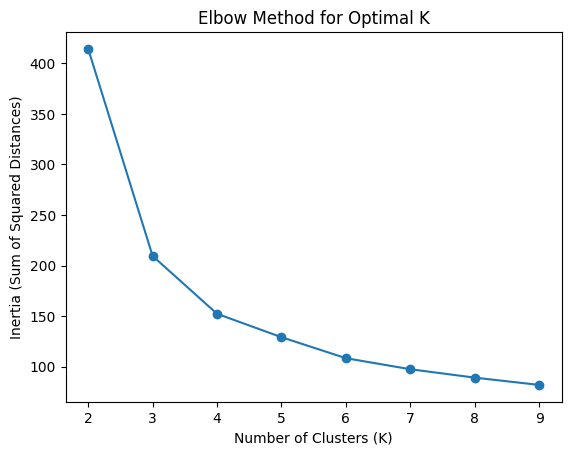

,hospital_name,resources_score,infrastructure_score,population_score,Cluster
0,Hospital_001,0.64,0.81,0.64,1
1,Hospital_002,0.81,0.77,0.02,0
2,Hospital_003,0.94,0.90,0.00,0
3,Hospital_004,0.84,0.77,0.00,0
5,Hospital_006,0.50,0.46,0.03,2


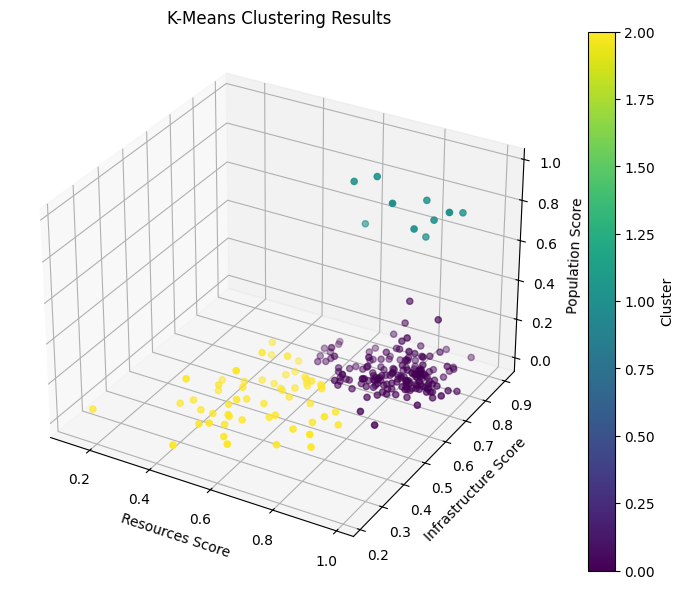

Silhouette Score: 0.5693


In [536]:
# ML Model - 3 Implementation unsupervised

X_clustering = hospital_df[['resources_score', 'infrastructure_score', 'population_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
K_range = range(2, 10)  # Try different cluster numbers

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hospital_df['Cluster'] = kmeans.fit_predict(X_scaled)

display(hospital_df[['hospital_name', 'resources_score', 'infrastructure_score', 'population_score', 'Cluster']].head())

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hospital_df['resources_score'], 
                      hospital_df['infrastructure_score'], 
                      hospital_df['population_score'], 
                      c=hospital_df['Cluster'], cmap='viridis')

ax.set_xlabel('Resources Score')
ax.set_ylabel('Infrastructure Score')
ax.set_zlabel('Population Score')
ax.set_title('K-Means Clustering Results')
plt.colorbar(scatter, label="Cluster")
plt.show()

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, hospital_df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

## pre_school_prediction

### location_mapping

In [537]:
pre_school_df['latitude'] = pre_school_df['district'].map({
    'Kattakurgan city': 39.89889,
    'Bulungur district': 39.7573054,
    'Jomboy district': 39.69889,
    'Narpay district': 39.9223,
    'Kattakurgan district': 39.89716,
    'Qushrabat district': 40.3333,
    'Nurabad district': 39.6100912,
    'Samarkand city': 39.65417,
    'Payarik district': 39.98917,
    'Urgut district': 39.4022,
    'Paxtachi district': 39.9167,     # approx center
    'Pastargom district': 39.65,      # approx
    'Taylak district': 39.6575,          # no precise data
    'Ishtihan district': 39.8371,        # no precise data
    'Oqdaryo district': 39.9092,         # no precise data
    'Samarkand district': 39.65417
})

pre_school_df['longitude'] = pre_school_df['district'].map({
    'Kattakurgan city': 66.25611,
    'Bulungur district': 67.27287,
    'Jomboy district': 67.09333,
    'Narpay district': 65.925,
    'Kattakurgan district': 66.27242,
    'Qushrabat district': 66.5000,
    'Nurabad district': 66.29622,
    'Samarkand city': 66.95972,
    'Payarik district': 66.84583,
    'Urgut district': 67.24310,
    'Paxtachi district': 66.0,
    'Pastargom district': 67.20,
    'Taylak district': 67.2353,
    'Ishtihan district': 66.4843,
    'Oqdaryo district': 67.0916,
    'Samarkand district': 66.95972
})

pre_school_df.head()

,region,district,kindergarten_name,outside_branches,group_count,land_area_built,external_sweeping_area,internal_cleaning_area,garden_area,leased_garden_area,design_capacity,vacant_land_area,educational_building_count,floor_count,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,sports_equipment_available,assembly_hall_condition,kitchen_condition,kitchen_water_supply,electricity_condition,has_generator,has_solar_panels,internal_electrical_condition,lighting_condition,heating_source,heating_fuel_source,boiler_room_condition,internal_heating_condition,water_availability,drinking_water_source,has_fence,internet_type,internet_usage,fire_safety_available,has_cctv,has_public_transport_nearby,accessible_for_disabled,repaired_or_reconstructed,total_students,earthquake_safety,restroom_location,restroom_water_condition,restroom_connected_to_sewage,staff_total,restroom_doors_partitions,restroom_handwash_water_soap,restroom_sewage_issues,restroom_water_issues,restroom_lighting_safe,classrooms_warm_in_winter,indoor_pipeline_installed,children_walk_more_than_3km,meets_modern_infrastructure,satisfied_with_condition,age_score,total_population,utilization_ratio,population_score,infrastructure_score,resources_score,latitude,longitude
0,Samarkand,Ishtihan district,kindergarten_1,0.0,0.2,1.0,0.3,0.3,0.3,0.0,50,1.0,0.3,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.0,0.8,0.5,1.0,80,0.5,0.8,0.3,0.5,6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,86,1.720000,0.00,0.62,0.64,39.837100,66.48430
1,Samarkand,Jomboy district,kindergarten_2,0.0,0.2,1.0,0.8,0.8,0.8,0.0,120,0.3,0.3,0.6,0.8,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.8,0.7,1.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,100,1.0,0.8,1.0,0.5,3,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,103,0.858333,1.00,0.75,0.81,39.698890,67.09333
2,Samarkand,Bulungur district,kindergarten_5,1.0,0.2,0.5,0.6,0.6,1.0,0.0,60,0.7,1.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,0.8,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,60,1.0,0.8,0.5,0.5,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,61,1.016667,0.25,0.76,0.92,39.757305,67.27287
3,Samarkand,Kattakurgan district,kindergarten_7,0.0,0.2,0.5,0.8,0.0,0.0,0.0,120,0.3,0.3,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,105,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.9,1.0,1.0,1.0,105,0.875000,0.97,0.63,0.83,39.897160,66.27242
5,Samarkand,Narpay district,kindergarten_10,0.6,0.4,0.5,0.3,0.3,0.3,0.0,125,0.3,0.6,0.3,0.4,0.5,0.8,0.5,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.0,0.0,0.0,0.5,1.0,0.7,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.5,0.0,124,0.5,0.8,0.3,0.0,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.7,0.5,1.0,0.6,130,1.040000,0.16,0.43,0.47,39.922300,65.92500


### need_category

In [538]:
# Define percentiles
low_threshold = 0.30
high_threshold = 0.60

# Compute the thresholds for each score
resources_low = pre_school_df['resources_score'].quantile(low_threshold)
resources_high = pre_school_df['resources_score'].quantile(high_threshold)

infra_low = pre_school_df['infrastructure_score'].quantile(low_threshold)
infra_high = pre_school_df['infrastructure_score'].quantile(high_threshold)

population_low = pre_school_df['population_score'].quantile(low_threshold)
population_high = pre_school_df['population_score'].quantile(high_threshold)

# Define the function for categorization
def classify_school(row):
    if (
        row['resources_score'] <= resources_low or
        row['infrastructure_score'] <= infra_low or
        row['population_score'] <= population_low
    ):
        return 'RED'  # Urgent Need
    
    elif (
        row['resources_score'] >= resources_high and
        row['infrastructure_score'] >= infra_high and
        row['population_score'] >= population_high
    ):
        return 'GREEN'  # Least Need
    
    else:
        return 'YELLOW'  # Moderate Need

# Apply classification
pre_school_df['need_category'] = pre_school_df.apply(classify_school, axis=1)

# Print category distribution
print(pre_school_df['need_category'].value_counts())

need_category
RED       288
YELLOW     87
GREEN      49
Name: count, dtype: int64


### ml_workflow

#### encoding and data_prep

In [539]:
# Drop 'school_name' from features (it's a primary key)
X = pre_school_df.drop(columns=["kindergarten_name", "need_category"])

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=["region", "district"], drop_first=True)

# Encode the target variable using Label Encoding
le = LabelEncoder()
y = le.fit_transform(pre_school_df["need_category"])

# Verify encoding
display(X.head())
display(y[:5])

,outside_branches,group_count,land_area_built,external_sweeping_area,internal_cleaning_area,garden_area,leased_garden_area,design_capacity,vacant_land_area,educational_building_count,floor_count,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,sports_equipment_available,assembly_hall_condition,kitchen_condition,kitchen_water_supply,electricity_condition,has_generator,has_solar_panels,internal_electrical_condition,lighting_condition,heating_source,heating_fuel_source,boiler_room_condition,internal_heating_condition,water_availability,drinking_water_source,has_fence,internet_type,internet_usage,fire_safety_available,has_cctv,has_public_transport_nearby,accessible_for_disabled,repaired_or_reconstructed,total_students,earthquake_safety,restroom_location,restroom_water_condition,restroom_connected_to_sewage,staff_total,restroom_doors_partitions,restroom_handwash_water_soap,restroom_sewage_issues,restroom_water_issues,restroom_lighting_safe,classrooms_warm_in_winter,indoor_pipeline_installed,children_walk_more_than_3km,meets_modern_infrastructure,satisfied_with_condition,age_score,total_population,utilization_ratio,population_score,infrastructure_score,resources_score,latitude,longitude,district_Ishtihan district,district_Jomboy district,district_Kattakurgan city,district_Kattakurgan district,district_Narpay district,district_Nurabad district,district_Oqdaryo district,district_Pastargom district,district_Paxtachi district,district_Payarik district,district_Qushrabat district,district_Samarkand city,district_Samarkand district,district_Taylak district,district_Urgut district
0,0.0,0.2,1.0,0.3,0.3,0.3,0.0,50,1.0,0.3,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.0,0.8,0.5,1.0,80,0.5,0.8,0.3,0.5,6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,86,1.720000,0.00,0.62,0.64,39.837100,66.48430,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,0.2,1.0,0.8,0.8,0.8,0.0,120,0.3,0.3,0.6,0.8,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.8,0.7,1.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,100,1.0,0.8,1.0,0.5,3,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,103,0.858333,1.00,0.75,0.81,39.698890,67.09333,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1.0,0.2,0.5,0.6,0.6,1.0,0.0,60,0.7,1.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,0.8,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,60,1.0,0.8,0.5,0.5,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,61,1.016667,0.25,0.76,0.92,39.757305,67.27287,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.0,0.2,0.5,0.8,0.0,0.0,0.0,120,0.3,0.3,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,105,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.9,1.0,1.0,1.0,105,0.875000,0.97,0.63,0.83,39.897160,66.27242,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,0.6,0.4,0.5,0.3,0.3,0.3,0.0,125,0.3,0.6,0.3,0.4,0.5,0.8,0.5,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.0,0.0,0.0,0.5,1.0,0.7,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.5,0.0,124,0.5,0.8,0.3,0.0,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.7,0.5,1.0,0.6,130,1.040000,0.16,0.43,0.47,39.922300,65.92500,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


array([1, 0, 0, 2, 1])

#### train_test_split

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### model_1 : Random Forest

In [541]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Make predictions for the entire dataset
y_pred_final = rf_model.predict(X)

# Convert numerical predictions back to categorical labels (RED, YELLOW, GREEN)
pre_school_df["predicted_need_Category"] = le.inverse_transform(y_pred_final)

# Save the entire dataset with predictions for Power BI
pre_school_df.to_csv("pre_school_df.csv", index=False)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.90      1.00      0.95        87
           2       0.88      0.54      0.67        26

    accuracy                           0.89       128
   macro avg       0.88      0.80      0.83       128
weighted avg       0.89      0.89      0.88       128

Accuracy: 0.890625


#### model_2 : XG_Boost

In [542]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        26

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

Accuracy: 1.0


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### model_3 : K_means

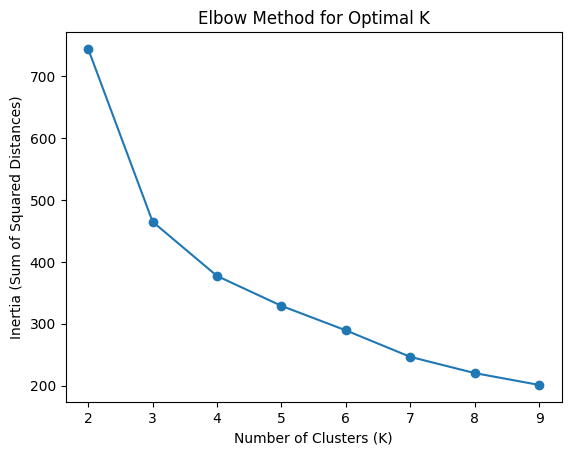

,kindergarten_name,resources_score,infrastructure_score,population_score,Cluster
0,kindergarten_1,0.64,0.62,0.00,0
1,kindergarten_2,0.81,0.75,1.00,2
2,kindergarten_5,0.92,0.76,0.25,0
3,kindergarten_7,0.83,0.63,0.97,2
5,kindergarten_10,0.47,0.43,0.16,1


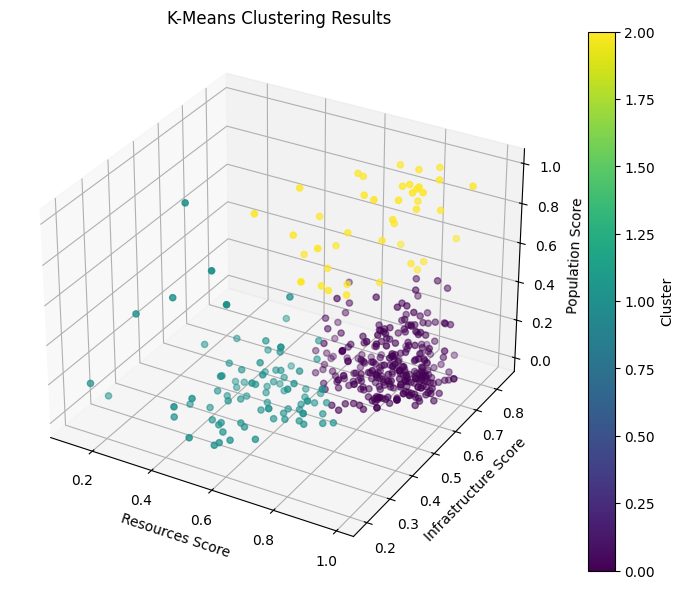

Silhouette Score: 0.5175


In [543]:
# ML Model - 3 Implementation unsupervised

X_clustering = pre_school_df[['resources_score', 'infrastructure_score', 'population_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
K_range = range(2, 10)  # Try different cluster numbers

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pre_school_df['Cluster'] = kmeans.fit_predict(X_scaled)

display(pre_school_df[['kindergarten_name', 'resources_score', 'infrastructure_score', 'population_score', 'Cluster']].head())

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pre_school_df['resources_score'], 
                      pre_school_df['infrastructure_score'], 
                      pre_school_df['population_score'], 
                      c=pre_school_df['Cluster'], cmap='viridis')

ax.set_xlabel('Resources Score')
ax.set_ylabel('Infrastructure Score')
ax.set_zlabel('Population Score')
ax.set_title('K-Means Clustering Results')
plt.colorbar(scatter, label="Cluster")
plt.show()

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, pre_school_df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

## sec_school_prediction

### location_mapping

In [600]:
sec_school_df['latitude'] = sec_school_df['district'].map({
    'Kattakurgan city': 39.89889,
    'Bulungur district': 39.7573054,
    'Jomboy district': 39.69889,
    'Narpay district': 39.9223,
    'Kattakurgan district': 39.89716,
    'Qushrabat district': 40.3333,
    'Nurabad district': 39.6100912,
    'Samarkand city': 39.65417,
    'Payarik district': 39.98917,
    'Urgut district': 39.4022,
    'Paxtachi district': 39.9167,     # approx center
    'Pastargom district': 39.65,      # approx
    'Taylak district': 39.6575,          # no precise data
    'Ishtihan district': 39.8371,        # no precise data
    'Oqdaryo district': 39.9092,         # no precise data
    'Samarkand district': 39.65417
})

sec_school_df['longitude'] = sec_school_df['district'].map({
    'Kattakurgan city': 66.25611,
    'Bulungur district': 67.27287,
    'Jomboy district': 67.09333,
    'Narpay district': 65.925,
    'Kattakurgan district': 66.27242,
    'Qushrabat district': 66.5000,
    'Nurabad district': 66.29622,
    'Samarkand city': 66.95972,
    'Payarik district': 66.84583,
    'Urgut district': 67.24310,
    'Paxtachi district': 66.0,
    'Pastargom district': 67.20,
    'Taylak district': 67.2353,
    'Ishtihan district': 66.4843,
    'Oqdaryo district': 67.0916,
    'Samarkand district': 66.95972
})
sec_school_df.head()

,id,region,district,school_name,usage %,population_score,sports_equipment,drinking_water,generator,solar_panels,heating_system_x,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,musculoskeletal_disorders_facilities,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline,resources_score,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system_y,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,infrastructure_score,latitude,longitude
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.99,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0,0.643836,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,0.712500,39.757305,67.27287
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.93,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0,0.595890,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.784375,39.757305,67.27287
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.91,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.765625,39.757305,67.27287
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,0.98,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0,0.732877,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.743750,39.757305,67.27287
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,0.97,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.753125,39.757305,67.27287


### need_category

In [601]:
# Define percentiles
low_threshold = 0.30
high_threshold = 0.60

# Compute the thresholds for each score
resources_low = sec_school_df['resources_score'].quantile(low_threshold)
resources_high = sec_school_df['resources_score'].quantile(high_threshold)

infra_low = sec_school_df['infrastructure_score'].quantile(low_threshold)
infra_high = sec_school_df['infrastructure_score'].quantile(high_threshold)

population_low = sec_school_df['population_score'].quantile(low_threshold)
population_high = sec_school_df['population_score'].quantile(high_threshold)

# Define the function for categorization
def classify_school(row):
    if (
        row['resources_score'] <= resources_low or
        row['infrastructure_score'] <= infra_low or
        row['population_score'] <= population_low
    ):
        return 'RED'  # Urgent Need
    
    elif (
        row['resources_score'] >= resources_high and
        row['infrastructure_score'] >= infra_high and
        row['population_score'] >= population_high
    ):
        return 'GREEN'  # Least Need
    
    else:
        return 'YELLOW'  # Moderate Need

# Apply classification
sec_school_df['need_category'] = sec_school_df.apply(classify_school, axis=1)

# Print category distribution
print(sec_school_df['need_category'].value_counts())

need_category
RED       699
YELLOW    346
GREEN     122
Name: count, dtype: int64


### ml_workflow

#### encoding and data_prep

In [602]:
# Drop 'school_name' from features (it's a primary key)
X = sec_school_df.drop(columns=["school_name", "need_category"])

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=["region", "district"], drop_first=True)

# Encode the target variable using Label Encoding
le = LabelEncoder()
y = le.fit_transform(sec_school_df["need_category"])

# Verify encoding
display(X.head())
display(y[:5])

,id,usage %,population_score,sports_equipment,drinking_water,generator,solar_panels,heating_system_x,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,musculoskeletal_disorders_facilities,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline,resources_score,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system_y,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,infrastructure_score,latitude,longitude,district_Bulungur district,district_Ishtikhon district,district_Jomboy district,district_Kattakurgan city,district_Kattakurgan district,district_Narpay district,district_Nurobod district,district_Oqdaryo district,district_Pastdargom district,district_Paxtachi district,district_Payariq district,district_Qoshrabot district,district_Samarkand district,district_Toylok district,district_Urgut district
0,1,76.58,0.99,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0,0.643836,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,0.712500,39.757305,67.27287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,80.57,0.93,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0,0.595890,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.784375,39.757305,67.27287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,81.60,0.91,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.765625,39.757305,67.27287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,69.32,0.98,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0,0.732877,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.743750,39.757305,67.27287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,68.81,0.97,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0,0.650685,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,0.753125,39.757305,67.27287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


array([2, 2, 2, 0, 2])

#### train_test_split

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### model_1 : Random Forest

In [604]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Make predictions for the entire dataset
y_pred_final = rf_model.predict(X)

# Convert numerical predictions back to categorical labels (RED, YELLOW, GREEN)
sec_school_df["predicted_need_Category"] = le.inverse_transform(y_pred_final)

# Save the entire dataset with predictions for Power BI
sec_school_df.to_csv("sec_school_df.csv", index=False)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        37
           1       0.99      1.00      1.00       210
           2       0.93      0.98      0.95       104

    accuracy                           0.97       351
   macro avg       0.97      0.92      0.94       351
weighted avg       0.97      0.97      0.97       351

Accuracy: 0.9715099715099715


#### model_2 : XG_Boost

In [605]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      1.00      1.00       210
           2       1.00      0.99      1.00       104

    accuracy                           1.00       351
   macro avg       0.99      1.00      0.99       351
weighted avg       1.00      1.00      1.00       351

Accuracy: 0.9971509971509972


#### model_3 : K_means

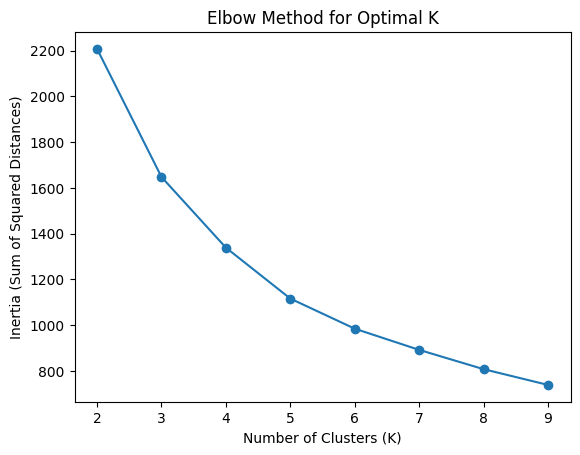

,school_name,resources_score,infrastructure_score,population_score,Cluster
0,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,0.643836,0.712500,0.99,0
1,10-sonli umumiy o'rta ta'lim maktabi,0.595890,0.784375,0.93,0
2,11-sonli umumiy o'rta ta'lim maktabi,0.650685,0.765625,0.91,0
3,12-sonli umumiy o'rta ta'lim maktabi,0.732877,0.743750,0.98,0
4,13-сонли умумий ўрта таълим мактаби,0.650685,0.753125,0.97,0


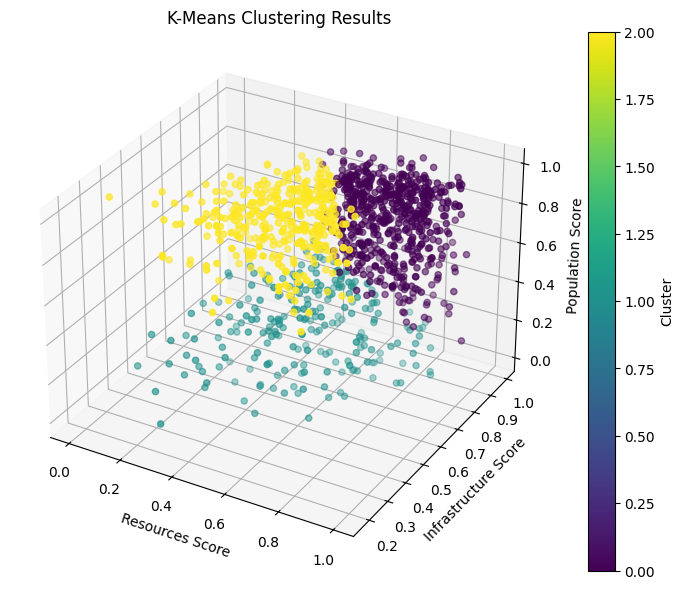

Silhouette Score: 0.3431


In [606]:
# ML Model - 3 Implementation unsupervised

X_clustering = sec_school_df[['resources_score', 'infrastructure_score', 'population_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
K_range = range(2, 10)  # Try different cluster numbers

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sec_school_df['Cluster'] = kmeans.fit_predict(X_scaled)

display(sec_school_df[['school_name', 'resources_score', 'infrastructure_score', 'population_score', 'Cluster']].head())

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sec_school_df['resources_score'], 
                      sec_school_df['infrastructure_score'], 
                      sec_school_df['population_score'], 
                      c=sec_school_df['Cluster'], cmap='viridis')

ax.set_xlabel('Resources Score')
ax.set_ylabel('Infrastructure Score')
ax.set_zlabel('Population Score')
ax.set_title('K-Means Clustering Results')
plt.colorbar(scatter, label="Cluster")
plt.show()

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, sec_school_df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

## csv

In [355]:
hospital_df.to_csv('hospital_df.csv', index=False)
pre_school_df.to_csv('pre_school_df.csv', index=False)
sec_school_df.to_csv('sec_school_df.csv', index=False)